In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import cv2
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier
import math

# Data Train

In [2]:
data_train = pd.read_csv("E:\\Lomba\\Find It\\\data-analytics-competition-find-it-2025\\dataset\\train.csv")
data_target = pd.read_csv("E:\\Lomba\\Find It\\data-analytics-competition-find-it-2025\\dataset\\target.csv")

In [3]:
gabung = pd.concat([data_train,data_target],axis=1)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName             downloads  deviceType hasPrivacyLink  \
0              Sports                   NaN  smartphone           True   
1             Medical              50 - 100      GLOBAL           True   
2               Games  50000000 - 100000000      GLOBAL           True   
3               Games                   NaN      GLOBAL           True   
4               Tools           1000 - 5000      GLOBAL           True   
...               ...                   ...         ...            ...   
6995        Utilities                   NaN      GLOBAL           True   
6996         Business                   NaN      GLOBAL           True   
6997  Personalization               10 - 50      GLOBAL           True   
6998         Business               10 - 50      GLOBAL           True   
6999    Entertainment            500 - 1000      GLOBAL           True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                     True                         low                   99.0   
1                      NaN                         NaN                   99.0   
2                     True                         low                    0.0   
3                      NaN                         NaN                   99.0   
4                      NaN                         NaN                   99.0   
...                    ...                         ...                    ...   
6995                   NaN                         NaN                   99.0   
6996                   NaN                         NaN                    NaN   
6997                   NaN                         NaN                    0.0   
6998                 False                        high                   99.0   
6999                 False                        high                    0.0   

        adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0     14.017220  160.400000                4.0                      medium   
1           NaN   17.500000                0.0                         NaN   
2     31.883163   30.766667                4.0                         NaN   
3           NaN   71.533333                4.0                         NaN   
4           NaN   52.400000                4.0                         NaN   
...         ...         ...                ...                         ...   
6995        NaN   26.266667                0.0                         NaN   
6996        NaN   23.800000                0.0                         NaN   
6997        NaN   27.500000                NaN                         NaN   
6998        NaN  124.033333                0.0                         NaN   
6999        NaN   61.066667                NaN                         NaN   

     appDescriptionBrandSafetyRating mfaRating  coppaRisk  
0                                low       low      False  
1                                low       low      False  
2                                low       low      False  
3                                low       low      False  
4                                low       low      False  
...                  

In [4]:
countryCode_prepo = gabung['countryCode'].mode()[0]

gabung['countryCode'].fillna(countryCode_prepo,inplace=True)

gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName             downloads  deviceType hasPrivacyLink  \
0              Sports                   NaN  smartphone           True   
1             Medical              50 - 100      GLOBAL           True   
2               Games  50000000 - 100000000      GLOBAL           True   
3               Games                   NaN      GLOBAL           True   
4               Tools           1000 - 5000      GLOBAL           True   
...               ...                   ...         ...            ...   
6995        Utilities                   NaN      GLOBAL           True   
6996         Business                   NaN      GLOBAL           True   
6997  Personalization               10 - 50      GLOBAL           True   
6998         Business               10 - 50      GLOBAL           True   
6999    Entertainment            500 - 1000      GLOBAL           True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                     True                         low                   99.0   
1                      NaN                         NaN                   99.0   
2                     True                         low                    0.0   
3                      NaN                         NaN                   99.0   
4                      NaN                         NaN                   99.0   
...                    ...                         ...                    ...   
6995                   NaN                         NaN                   99.0   
6996                   NaN                         NaN                    NaN   
6997                   NaN                         NaN                    0.0   
6998                 False                        high                   99.0   
6999                 False                        high                    0.0   

        adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0     14.017220  160.400000                4.0                      medium   
1           NaN   17.500000                0.0                         NaN   
2     31.883163   30.766667                4.0                         NaN   
3           NaN   71.533333                4.0                         NaN   
4           NaN   52.400000                4.0                         NaN   
...         ...         ...                ...                         ...   
6995        NaN   26.266667                0.0                         NaN   
6996        NaN   23.800000                0.0                         NaN   
6997        NaN   27.500000                NaN                         NaN   
6998        NaN  124.033333                0.0                         NaN   
6999        NaN   61.066667                NaN                         NaN   

     appDescriptionBrandSafetyRating mfaRating  coppaRisk  
0                                low       low      False  
1                                low       low      False  
2                                low       low      False  
3                                low       low      False  
4                                low       low      False  
...                  

In [5]:
def convert_downloads_range(x):
    if pd.isna(x):
        return np.nan
    
    try:
        parts = x.replace(',','').split('-')
        if len(parts) == 2:
            return (int(parts[0].strip()) + int(parts[1].strip())) / 2
    
    except:
        pass
    return np.nan

gabung['downloads'] = gabung['downloads'].apply(convert_downloads_range)
median_download = gabung['downloads'].median()
gabung['downloads'].fillna(median_download,inplace=True)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType hasPrivacyLink  \
0              Sports       750.0  smartphone           True   
1             Medical        75.0      GLOBAL           True   
2               Games  75000000.0      GLOBAL           True   
3               Games       750.0      GLOBAL           True   
4               Tools      3000.0      GLOBAL           True   
...               ...         ...         ...            ...   
6995        Utilities       750.0      GLOBAL           True   
6996         Business       750.0      GLOBAL           True   
6997  Personalization        30.0      GLOBAL           True   
6998         Business        30.0      GLOBAL           True   
6999    Entertainment       750.0      GLOBAL           True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                     True                         low                   99.0   
1                      NaN                         NaN                   99.0   
2                     True                         low                    0.0   
3                      NaN                         NaN                   99.0   
4                      NaN                         NaN                   99.0   
...                    ...                         ...                    ...   
6995                   NaN                         NaN                   99.0   
6996                   NaN                         NaN                    NaN   
6997                   NaN                         NaN                    0.0   
6998                 False                        high                   99.0   
6999                 False                        high                    0.0   

        adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0     14.017220  160.400000                4.0                      medium   
1           NaN   17.500000                0.0                         NaN   
2     31.883163   30.766667                4.0                         NaN   
3           NaN   71.533333                4.0                         NaN   
4           NaN   52.400000                4.0                         NaN   
...         ...         ...                ...                         ...   
6995        NaN   26.266667                0.0                         NaN   
6996        NaN   23.800000                0.0                         NaN   
6997        NaN   27.500000                NaN                         NaN   
6998        NaN  124.033333                0.0                         NaN   
6999        NaN   61.066667                NaN                         NaN   

     appDescriptionBrandSafetyRating mfaRating  coppaRisk  
0                                low       low      False  
1                                low       low      False  
2                                low       low      False  
3                                low       low      False  
4                                low       low      False  
...                              ...       ...        ...  
6995                             low       low      False  
6996                 

In [6]:
modus_privacy = gabung['hasPrivacyLink'].mode()[0]
gabung['hasPrivacyLink'].fillna(modus_privacy,inplace=True)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                     True                         low                   99.0   
1                      NaN                         NaN                   99.0   
2                     True                         low                    0.0   
3                      NaN                         NaN                   99.0   
4                      NaN                         NaN                   99.0   
...                    ...                         ...                    ...   
6995                   NaN                         NaN                   99.0   
6996                   NaN                         NaN                    NaN   
6997                   NaN                         NaN                    0.0   
6998                 False                        high                   99.0   
6999                 False                        high                    0.0   

        adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0     14.017220  160.400000                4.0                      medium   
1           NaN   17.500000                0.0                         NaN   
2     31.883163   30.766667                4.0                         NaN   
3           NaN   71.533333                4.0                         NaN   
4           NaN   52.400000                4.0                         NaN   
...         ...         ...                ...                         ...   
6995        NaN   26.266667                0.0                         NaN   
6996        NaN   23.800000                0.0                         NaN   
6997        NaN   27.500000                NaN                         NaN   
6998        NaN  124.033333                0.0                         NaN   
6999        NaN   61.066667                NaN                         NaN   

     appDescriptionBrandSafetyRating mfaRating  coppaRisk  
0                                low       low      False  
1                                low       low      False  
2                                low       low      False  
3                                low       low      False  
4                                low       low      False  
...                              ...       ...        ...  
6995                             low       low      False  
6996     

In [7]:
gabung['hasTermsOfServiceLink'] = gabung['hasTermsOfServiceLink'].map({True:1,False:0})

imputer = KNNImputer(n_neighbors=5)
gabung[['hasTermsOfServiceLink']] = imputer.fit_transform(gabung[['hasTermsOfServiceLink']])

gabung['hasTermsOfServiceLink'] = gabung['hasTermsOfServiceLink'].apply(lambda x: True if x >= 0.5 else False)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                         NaN   
2                      True                         low   
3                     False                         NaN   
4                     False                         NaN   
...                     ...                         ...   
6995                  False                         NaN   
6996                  False                         NaN   
6997                  False                         NaN   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                      99.0  14.017220  160.400000                4.0   
1                      99.0        NaN   17.500000                0.0   
2                       0.0  31.883163   30.766667                4.0   
3                      99.0        NaN   71.533333                4.0   
4                      99.0        NaN   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                   99.0        NaN   26.266667                0.0   
6996                    NaN        NaN   23.800000                0.0   
6997                    0.0        NaN   27.500000                NaN   
6998                   99.0        NaN  124.033333                0.0   
6999                    0.0        NaN   61.066667                NaN   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                            NaN                             low       low   
2                            NaN                             low       low   
3                            NaN                             low       low   
4                            NaN                             low       low   
...                          ...                             ...       ...   
6995                         NaN                             low       low   
6996                         NaN                             low       low   
6997                         NaN                          medium       low   
6998                         NaN 

In [8]:
gabung['hasTermsOfServiceLinkRating_encoded'] = gabung['hasTermsOfServiceLinkRating'].map({'low': 0, 'high': 1})

df_impute = gabung[['hasTermsOfServiceLinkRating_encoded']]

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_impute), columns=['hasTermsOfServiceLinkRating_encoded'])

gabung['hasTermsOfServiceLinkRating_encoded'] = df_imputed['hasTermsOfServiceLinkRating_encoded']

gabung['hasTermsOfServiceLinkRating'] = gabung['hasTermsOfServiceLinkRating_encoded'].round().map({0: 'low', 1: 'high'})

gabung.drop(columns='hasTermsOfServiceLinkRating_encoded', inplace=True)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                      99.0  14.017220  160.400000                4.0   
1                      99.0        NaN   17.500000                0.0   
2                       0.0  31.883163   30.766667                4.0   
3                      99.0        NaN   71.533333                4.0   
4                      99.0        NaN   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                   99.0        NaN   26.266667                0.0   
6996                    NaN        NaN   23.800000                0.0   
6997                    0.0        NaN   27.500000                NaN   
6998                   99.0        NaN  124.033333                0.0   
6999                    0.0        NaN   61.066667                NaN   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                            NaN                             low       low   
2                            NaN                             low       low   
3                            NaN                             low       low   
4                            NaN                             low       low   
...                          ...                             ...       ...   
6995                         NaN                             low       low   
6996                         NaN                             low       low   
6997                         NaN                          medium       low   
6998                         NaN 

In [9]:
gabung['isCorporateEmailScore'] = gabung['isCorporateEmailScore'].map({0.0:0,99.0:1})
imputer = KNNImputer(n_neighbors=5)
gabung[['isCorporateEmailScore']] = imputer.fit_transform(gabung[['isCorporateEmailScore']])

gabung['isCorporateEmailScore'] = gabung['isCorporateEmailScore'].round().astype(int)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1        NaN   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1        NaN   71.533333                4.0   
4                         1        NaN   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1        NaN   26.266667                0.0   
6996                      0        NaN   23.800000                0.0   
6997                      0        NaN   27.500000                NaN   
6998                      1        NaN  124.033333                0.0   
6999                      0        NaN   61.066667                NaN   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                            NaN                             low       low   
2                            NaN                             low       low   
3                            NaN                             low       low   
4                            NaN                             low       low   
...                          ...                             ...       ...   
6995                         NaN                             low       low   
6996                         NaN                             low       low   
6997                         NaN                          medium       low   
6998                         NaN 

In [10]:
median_adspend = gabung['adSpent'].median()
gabung['adSpent'].fillna(median_adspend,inplace=True)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1   7.945580   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1   7.945580   71.533333                4.0   
4                         1   7.945580   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1   7.945580   26.266667                0.0   
6996                      0   7.945580   23.800000                0.0   
6997                      0   7.945580   27.500000                NaN   
6998                      1   7.945580  124.033333                0.0   
6999                      0   7.945580   61.066667                NaN   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                            NaN                             low       low   
2                            NaN                             low       low   
3                            NaN                             low       low   
4                            NaN                             low       low   
...                          ...                             ...       ...   
6995                         NaN                             low       low   
6996                         NaN                             low       low   
6997                         NaN                          medium       low   
6998                         NaN 

In [11]:
mean_averageUserRating = round(gabung['averageUserRating'].mean())
#mean_averageUserRating

gabung['averageUserRating'].fillna(mean_averageUserRating,inplace=True)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1   7.945580   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1   7.945580   71.533333                4.0   
4                         1   7.945580   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1   7.945580   26.266667                0.0   
6996                      0   7.945580   23.800000                0.0   
6997                      0   7.945580   27.500000                2.0   
6998                      1   7.945580  124.033333                0.0   
6999                      0   7.945580   61.066667                2.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                            NaN                             low       low   
2                            NaN                             low       low   
3                            NaN                             low       low   
4                            NaN                             low       low   
...                          ...                             ...       ...   
6995                         NaN                             low       low   
6996                         NaN                             low       low   
6997                         NaN                          medium       low   
6998                         NaN 

In [12]:
gabung['appContentBrandSafetyRating_edit'] = gabung['appContentBrandSafetyRating'].map({'low':0,'medium':1,'high':2})

imputasi_appcontent = gabung[['appContentBrandSafetyRating_edit']]

imputer = KNNImputer(n_neighbors=5)
appcontent_imputed = pd.DataFrame(imputer.fit_transform(imputasi_appcontent),columns=['appContentBrandSafetyRating_edit'])

gabung['appContentBrandSafetyRating_edit'] = appcontent_imputed['appContentBrandSafetyRating_edit']
gabung['appContentBrandSafetyRating'] = gabung['appContentBrandSafetyRating_edit'].round().map({0:'low',1:'medium',2:'high'})

gabung.drop(columns='appContentBrandSafetyRating_edit',inplace=True)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1   7.945580   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1   7.945580   71.533333                4.0   
4                         1   7.945580   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1   7.945580   26.266667                0.0   
6996                      0   7.945580   23.800000                0.0   
6997                      0   7.945580   27.500000                2.0   
6998                      1   7.945580  124.033333                0.0   
6999                      0   7.945580   61.066667                2.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                             low       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
6995                      medium                             low       low   
6996                      medium                             low       low   
6997                      medium                          medium       low   
6998                      medium 

In [13]:
median_appage = gabung['appAge'].median()
#median_appage
gabung['appAge'].fillna(median_appage,inplace=True)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1   7.945580   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1   7.945580   71.533333                4.0   
4                         1   7.945580   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1   7.945580   26.266667                0.0   
6996                      0   7.945580   23.800000                0.0   
6997                      0   7.945580   27.500000                2.0   
6998                      1   7.945580  124.033333                0.0   
6999                      0   7.945580   61.066667                2.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                             low       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
6995                      medium                             low       low   
6996                      medium                             low       low   
6997                      medium                          medium       low   
6998                      medium 

# Feature engineering

In [14]:
gabung['hasComplianceLinks'] = ((gabung['hasPrivacyLink'] == 1) & 
                                (gabung['hasTermsOfServiceLink'] == 1)).astype(int)

gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1   7.945580   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1   7.945580   71.533333                4.0   
4                         1   7.945580   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1   7.945580   26.266667                0.0   
6996                      0   7.945580   23.800000                0.0   
6997                      0   7.945580   27.500000                2.0   
6998                      1   7.945580  124.033333                0.0   
6999                      0   7.945580   61.066667                2.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                             low       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
6995                      medium                             low       low   
6996                      medium                             low       low   
6997                      medium                          medium       low   
6998                      medium 

In [15]:
gabung['weightedRating'] = gabung['averageUserRating'] * gabung['userRatingCount']
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1   7.945580   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1   7.945580   71.533333                4.0   
4                         1   7.945580   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1   7.945580   26.266667                0.0   
6996                      0   7.945580   23.800000                0.0   
6997                      0   7.945580   27.500000                2.0   
6998                      1   7.945580  124.033333                0.0   
6999                      0   7.945580   61.066667                2.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                             low       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
6995                      medium                             low       low   
6996                      medium                             low       low   
6997                      medium                          medium       low   
6998                      medium 

In [16]:
gabung['ratingStabilityScore'] = gabung['averageUserRating'] / np.log(gabung['appAge'] + 1)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  \
0                         1  14.017220  160.400000                4.0   
1                         1   7.945580   17.500000                0.0   
2                         0  31.883163   30.766667                4.0   
3                         1   7.945580   71.533333                4.0   
4                         1   7.945580   52.400000                4.0   
...                     ...        ...         ...                ...   
6995                      1   7.945580   26.266667                0.0   
6996                      0   7.945580   23.800000                0.0   
6997                      0   7.945580   27.500000                2.0   
6998                      1   7.945580  124.033333                0.0   
6999                      0   7.945580   61.066667                2.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                             low       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
6995                      medium                             low       low   
6996                      medium                             low       low   
6997                      medium                          medium       low   
6998                      medium 

In [17]:
gabung['adSpentPerDay'] = gabung['adSpent'] / gabung['appAge']
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore  ...      appAge  averageUserRating  \
0                         1  ...  160.400000                4.0   
1                         1  ...   17.500000                0.0   
2                         0  ...   30.766667                4.0   
3                         1  ...   71.533333                4.0   
4                         1  ...   52.400000                4.0   
...                     ...  ...         ...                ...   
6995                      1  ...   26.266667                0.0   
6996                      0  ...   23.800000                0.0   
6997                      0  ...   27.500000                2.0   
6998                      1  ...  124.033333                0.0   
6999                      0  ...   61.066667                2.0   

      appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                          medium                             low       low   
1                          medium                             low       low   
2                          medium                             low       low   
3                          medium                             low       low   
4                          medium                             low       low   
...                           ...                             ...       ...   
6995                       medium                             low       low   
6996                       medium                             low       low   
6997                       medium                          medium       low   
6998                       medium                             low       low   
6999            

In [18]:
rating_map = {'low':0,'medium':1,'high':2}

gabung['appContentBrandSafetyScore'] = gabung['appContentBrandSafetyRating'].map(rating_map)
gabung['appDescriptionBrandSafetyScore'] = gabung['appDescriptionBrandSafetyRating'].map(rating_map)

gabung['totalBrandSafetyScore'] = gabung['appContentBrandSafetyScore'] + gabung['appDescriptionBrandSafetyScore']
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore  ...  appDescriptionBrandSafetyRating  mfaRating  \
0                         1  ...                              low        low   
1                         1  ...                              low        low   
2                         0  ...                              low        low   
3                         1  ...                              low        low   
4                         1  ...                              low        low   
...                     ...  ...                              ...        ...   
6995                      1  ...                              low        low   
6996                      0  ...                              low        low   
6997                      0  ...                           medium        low   
6998                      1  ...                              low        low   
6999                      0  ...                              low        low   

      coppaRisk hasComplianceLinks weightedRating ratingStabilityScore  \
0         False                  1       510924.0             0.786800   
1         False                  0            0.0             0.000000   
2         False                  1       204572.0             1.156598   
3         False                  0         4296.0             0.933697   
4         False                  0           68.0             1.005578   
...         ...                ...            ...                  ...   
6995      False                  0            0.0             0.000000   
6996      False                  0            0.0             0.000000   
6997      False                  0            0.0             0

In [19]:
gabung['developerCountry'].unique()

array(['NORWAY', 'ADDRESS NOT LISTED IN PLAYSTORE',
       'UNITED ARAB EMIRATES', 'GERMANY', 'CANNOT IDENTIFY COUNTRY',
       'FINLAND', 'SINGAPORE', 'UNITED STATES', 'REPUBLIC OF KOREA',
       'MONGOLIA', 'PAKISTAN', 'VIET NAM', 'OMAN', 'FRANCE', 'INDIA',
       'CHINA', 'NETHERLANDS', 'RUSSIAN FEDERATION', 'INDONESIA', 'ITALY',
       'UZBEKISTAN', 'UNITED KINGDOM', 'CANADA', 'NEW ZEALAND',
       'SRI LANKA', 'AUSTRALIA', "COTE D'IVOIRE", 'IRELAND', 'KAZAKHSTAN',
       'HONG KONG', 'CHILE', 'BAHRAIN', 'JAPAN', 'SWITZERLAND', 'ISRAEL',
       'SPAIN', 'TURKEY', 'ESTONIA', 'SWEDEN', 'DOMINICAN REPUBLIC',
       'AUSTRIA', 'MALAYSIA', 'POLAND', 'CYPRUS', 'UKRAINE',
       'ISLE OF MAN', 'ARGENTINA', 'BANGLADESH', 'ICELAND', 'JORDAN',
       'MOROCCO', 'PERU', 'NIGER', 'BULGARIA', 'ROMANIA', 'SLOVENIA',
       'SOUTH AFRICA', 'KENYA', 'NIGERIA', 'ALBANIA', 'CZECH REPUBLIC',
       'SAUDI ARABIA', 'PANAMA', 'ANDORRA', 'THAILAND', 'MALTA',
       'VENEZUELA', 'GREECE', 'YEMEN', 'EGYPT

In [20]:
gabung['countryCode'].unique()

array(['RO', 'GLOBAL', 'CZ', 'GT', 'RU', 'EMEA', 'HR', 'APAC', 'ES', 'DE',
       'LATAM', 'ID', 'ZM', 'PH', 'BG', 'KG', 'IT', 'UG', 'NL', 'BD',
       'SE', 'PL', 'TH', 'VN', 'SA', 'AR', 'UA', 'MY', 'MX', 'AM', 'US',
       'AT', 'BR', 'BY', 'UZ', 'TR', 'MN', 'NO', 'PS', 'GB', 'GR', 'SG',
       'BE', 'GE', 'CO', 'AE', 'EC', 'IN', 'OM', 'JO', 'TN', 'PT', 'SO',
       'CN', 'HK', 'NG', 'NZ', 'ZA', 'HN', 'CL', 'PK', 'KH', 'FR', 'KZ',
       'DO', 'SK', 'QA', 'CI', 'NI', 'TW', 'CH', 'CA', 'KR', 'JP', 'AZ',
       'LB', 'AU', 'PY', 'SX', 'CY', 'HU', 'FI', 'PR', 'CR', 'SN', 'IQ',
       'TJ', 'PA', 'KW', 'RS', 'DK', 'EG', 'IL', 'LY', 'SD', 'AF', 'UY',
       'MM', 'IE', 'SV', 'BH', 'MK', 'VE', 'BJ', 'GY', 'PE', 'CD', 'GU',
       'EE', 'DJ', 'DZ', 'KE', 'YE', 'JM', 'MA', 'CM', 'RE', 'LK', 'IR'],
      dtype=object)

In [21]:
import pycountry

def country_to_iso(name):
    try:
        return pycountry.countries.lookup(name).alpha_2
    except:
        return 'UNKNOWN'

gabung['dev_iso'] = gabung['developerCountry'].apply(country_to_iso)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore  ...  mfaRating  coppaRisk  hasComplianceLinks  \
0                         1  ...        low      False                   1   
1                         1  ...        low      False                   0   
2                         0  ...        low      False                   1   
3                         1  ...        low      False                   0   
4                         1  ...        low      False                   0   
...                     ...  ...        ...        ...                 ...   
6995                      1  ...        low      False                   0   
6996                      0  ...        low      False                   0   
6997                      0  ...        low      False                   0   
6998                      1  ...        low      False                   0   
6999                      0  ...        low      False                   0   

     weightedRating ratingStabilityScore adSpentPerDay  \
0          510924.0             0.786800      0.087389   
1               0.0             0.000000      0.454033   
2          204572.0             1.156598      1.036289   
3            4296.0             0.933697      0.111075   
4              68.0             1.005578      0.151633   
...             ...                  ...           ...   
6995            0.0             0.000000      0.302497   
6996            0.0             0.000000      0.333848   
6997            0.0             0.597032      0.288930   
6998            0.0             0.000000      0.064060   
6999            0.0             0.484472      0.130113   

      appContentBrandSafetyScore  appDescriptionBrandSaf

In [22]:
region_map = {
    'NA': ['UNITED STATES', 'CANADA', 'MEXICO'],
    'LATAM': ['BRAZIL', 'ARGENTINA', 'CHILE', 'COLOMBIA', 'PERU', 'URUGUAY', 'ECUADOR',
              'VENEZUELA', 'GUATEMALA', 'COSTA RICA', 'HONDURAS', 'NICARAGUA', 'PANAMA', 'BELIZE'],
    'EMEA': ['FRANCE', 'GERMANY', 'UNITED KINGDOM', 'ITALY', 'SPAIN', 'RUSSIAN FEDERATION', 'NETHERLANDS',
             'NORWAY', 'SWEDEN', 'DENMARK', 'FINLAND', 'TURKEY', 'GREECE', 'EGYPT', 'SOUTH AFRICA', 'NIGERIA',
             'MOROCCO', 'KENYA', 'ZIMBABWE', 'ALGERIA', 'CYPRUS', 'ROMANIA', 'BULGARIA', 'UKRAINE', 'BELGIUM',
             'CZECH REPUBLIC', 'POLAND', 'PORTUGAL', 'IRELAND', 'SWITZERLAND', 'AUSTRIA', 'HUNGARY', 'SLOVENIA',
             'SENEGAL', 'MALI', 'ANDORRA', 'GHANA', 'SERBIA', 'ARMENIA', 'ISRAEL', 'ESTONIA', 'LITHUANIA',
             'SLOVENIA', 'SLOVAKIA', 'ALBANIA', 'GEORGIA', 'KAZAKHSTAN', 'BELARUS', 'LUXEMBOURG'],
    'APAC': ['INDIA', 'INDONESIA', 'JAPAN', 'CHINA', 'SINGAPORE', 'PHILIPPINES', 'VIET NAM', 'MALAYSIA',
             'THAILAND', 'REPUBLIC OF KOREA', 'AUSTRALIA', 'NEW ZEALAND', 'BANGLADESH', 'PAKISTAN', 'NEPAL',
             'SRI LANKA', 'MONGOLIA', 'HONG KONG', 'TAIWAN, PROVINCE OF CHINA', 'BRUNEI DARUSSALAM', 'MALDIVES'],
    'MEA': ['UNITED ARAB EMIRATES', 'OMAN', 'BAHRAIN', 'SAUDI ARABIA', 'JORDAN', 'QATAR', 'YEMEN', 'IRAQ', 
            'PALESTINE, STATE OF'],
    'UNKNOWN': ['ADDRESS NOT LISTED IN PLAYSTORE', 'CANNOT IDENTIFY COUNTRY',
                'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.',
                'STATUTORY MASKING ENABLED']
}

def map_region(country):
    for region, countries in region_map.items():
        if country in countries:
            return region
    return 'UNKNOWN'

gabung['dev_region'] = gabung['developerCountry'].apply(map_region)

gabung['regionMatch'] = (gabung['dev_region'] == gabung['countryCode']).astype(int)

gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore  ...  hasComplianceLinks  weightedRating  \
0                         1  ...                   1        510924.0   
1                         1  ...                   0             0.0   
2                         0  ...                   1        204572.0   
3                         1  ...                   0          4296.0   
4                         1  ...                   0            68.0   
...                     ...  ...                 ...             ...   
6995                      1  ...                   0             0.0   
6996                      0  ...                   0             0.0   
6997                      0  ...                   0             0.0   
6998                      1  ...                   0             0.0   
6999                      0  ...                   0             0.0   

      ratingStabilityScore adSpentPerDay appContentBrandSafetyScore  \
0                 0.786800      0.087389                          1   
1                 0.000000      0.454033                          1   
2                 1.156598      1.036289                          1   
3                 0.933697      0.111075                          1   
4                 1.005578      0.151633                          1   
...                    ...           ...                        ...   
6995              0.000000      0.302497                          1   
6996              0.000000      0.333848                          1   
6997              0.597032      0.288930                          1   
6998              0.000000      0.064060                          1   
6999              0.484472      0.130113    

In [23]:
gabung['isGameHighMfa'] = ((gabung['primaryGenreName'] == 'Games') & (gabung['mfaRating'] == 'high')).astype(int)
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore  ...  weightedRating  ratingStabilityScore  \
0                         1  ...        510924.0              0.786800   
1                         1  ...             0.0              0.000000   
2                         0  ...        204572.0              1.156598   
3                         1  ...          4296.0              0.933697   
4                         1  ...            68.0              1.005578   
...                     ...  ...             ...                   ...   
6995                      1  ...             0.0              0.000000   
6996                      0  ...             0.0              0.000000   
6997                      0  ...             0.0              0.597032   
6998                      1  ...             0.0              0.000000   
6999                      0  ...             0.0              0.484472   

      adSpentPerDay appContentBrandSafetyScore appDescriptionBrandSafetyScore  \
0          0.087389                          1                              0   
1          0.454033                          1                              0   
2          1.036289                          1                              0   
3          0.111075                          1                              0   
4          0.151633                          1                              0   
...             ...                        ...                            ...   
6995       0.302497                          1                              0   
6996       0.333848                          1                              0   
6997       0.288930                          1                          

In [24]:
gabung['coppaRisk'] = gabung['coppaRisk'].astype(int)

In [25]:
numeric_cols = gabung.select_dtypes(include='number')
correlation_with_target = numeric_cols.corr()['coppaRisk'].sort_values(ascending=False)
print(correlation_with_target)

coppaRisk                         1.000000
ratingStabilityScore              0.102055
hasComplianceLinks                0.097430
averageUserRating                 0.096138
userRatingCount                   0.065432
weightedRating                    0.065070
isCorporateEmailScore             0.040421
adSpent                           0.032149
regionMatch                       0.029514
adSpentPerDay                     0.023623
downloads                         0.012533
appAge                           -0.000458
isGameHighMfa                    -0.010513
appContentBrandSafetyScore       -0.060825
appDescriptionBrandSafetyScore   -0.096584
totalBrandSafetyScore            -0.110700
Name: coppaRisk, dtype: float64


In [26]:
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

                                userRatingCount  downloads  \
userRatingCount                        1.000000   0.532102   
downloads                              0.532102   1.000000   
isCorporateEmailScore                  0.054501   0.032200   
adSpent                                0.803158   0.161533   
appAge                                 0.089158   0.064887   
averageUserRating                      0.053119   0.028668   
coppaRisk                              0.065432   0.012533   
hasComplianceLinks                     0.091798   0.062885   
weightedRating                         0.999870   0.532187   
ratingStabilityScore                   0.021252   0.010047   
adSpentPerDay                          0.640295   0.127986   
appContentBrandSafetyScore            -0.078903  -0.017586   
appDescriptionBrandSafetyScore         0.009409  -0.007670   
totalBrandSafetyScore                 -0.016106  -0.012834   
regionMatch                           -0.002665  -0.001625   
isGameHi

# Encoding

In [27]:
gabung

developerCountry countryCode  userRatingCount  \
0                              NORWAY          RO           127731   
1     ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2                UNITED ARAB EMIRATES          CZ            51143   
3                             GERMANY      GLOBAL             1074   
4             CANNOT IDENTIFY COUNTRY      GLOBAL               17   
...                               ...         ...              ...   
6995  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6996  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6997  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6998  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
6999          CANNOT IDENTIFY COUNTRY      GLOBAL                0   

     primaryGenreName   downloads  deviceType  hasPrivacyLink  \
0              Sports       750.0  smartphone            True   
1             Medical        75.0      GLOBAL            True   
2               Games  75000000.0      GLOBAL            True   
3               Games       750.0      GLOBAL            True   
4               Tools      3000.0      GLOBAL            True   
...               ...         ...         ...             ...   
6995        Utilities       750.0      GLOBAL            True   
6996         Business       750.0      GLOBAL            True   
6997  Personalization        30.0      GLOBAL            True   
6998         Business        30.0      GLOBAL            True   
6999    Entertainment       750.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore  ...  weightedRating  ratingStabilityScore  \
0                         1  ...        510924.0              0.786800   
1                         1  ...             0.0              0.000000   
2                         0  ...        204572.0              1.156598   
3                         1  ...          4296.0              0.933697   
4                         1  ...            68.0              1.005578   
...                     ...  ...             ...                   ...   
6995                      1  ...             0.0              0.000000   
6996                      0  ...             0.0              0.000000   
6997                      0  ...             0.0              0.597032   
6998                      1  ...             0.0              0.000000   
6999                      0  ...             0.0              0.484472   

      adSpentPerDay appContentBrandSafetyScore appDescriptionBrandSafetyScore  \
0          0.087389                          1                              0   
1          0.454033                          1                              0   
2          1.036289                          1                              0   
3          0.111075                          1                              0   
4          0.151633                          1                              0   
...             ...                        ...                            ...   
6995       0.302497                          1                              0   
6996       0.333848                          1                              0   
6997       0.288930                          1                          

In [28]:
gabung['developerCountry'].unique()

def simplify_dev_country(val):
    if val == 'ADDRESS NOT LISTED IN PLAYSTORE':
        return 'Not_Listed'
    elif val == 'CANNOT IDENTIFY COUNTRY':
        return 'Not_Listed'
    elif val == 'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.':
        return 'Not_Listed'
    elif val == 'STATUTORY MASKING ENABLED':
        return 'Not_Listed'
    else:
        return 'Listed'

gabung['developerCountry_clean'] = gabung['developerCountry'].apply(simplify_dev_country)
gabung.drop(columns='developerCountry',inplace=True)
gabung

countryCode  userRatingCount primaryGenreName   downloads  deviceType  \
0             RO           127731           Sports       750.0  smartphone   
1         GLOBAL                0          Medical        75.0      GLOBAL   
2             CZ            51143            Games  75000000.0      GLOBAL   
3         GLOBAL             1074            Games       750.0      GLOBAL   
4         GLOBAL               17            Tools      3000.0      GLOBAL   
...          ...              ...              ...         ...         ...   
6995      GLOBAL                0        Utilities       750.0      GLOBAL   
6996      GLOBAL                0         Business       750.0      GLOBAL   
6997      GLOBAL                0  Personalization        30.0      GLOBAL   
6998      GLOBAL                0         Business        30.0      GLOBAL   
6999      GLOBAL                0    Entertainment       750.0      GLOBAL   

      hasPrivacyLink  hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0               True                   True                         low   
1               True                  False                        high   
2               True                   True                         low   
3               True                  False                        high   
4               True                  False                        high   
...              ...                    ...                         ...   
6995            True                  False                        high   
6996            True                  False                        high   
6997            True                  False                        high   
6998            True                  False                        high   
6999            True                  False                        high   

      isCorporateEmailScore    adSpent  ...  ratingStabilityScore  \
0                         1  14.017220  ...              0.786800   
1                         1   7.945580  ...              0.000000   
2                         0  31.883163  ...              1.156598   
3                         1   7.945580  ...              0.933697   
4                         1   7.945580  ...              1.005578   
...                     ...        ...  ...                   ...   
6995                      1   7.945580  ...              0.000000   
6996                      0   7.945580  ...              0.000000   
6997                      0   7.945580  ...              0.597032   
6998                      1   7.945580  ...              0.000000   
6999                      0   7.945580  ...              0.484472   

      adSpentPerDay appContentBrandSafetyScore appDescriptionBrandSafetyScore  \
0          0.087389                          1                              0   
1          0.454033                          1                              0   
2          1.036289                          1                              0   
3          0.111075                          1                              0   
4          0.151633                          1                              0   
...             ...                        ...                            ...   
6995       0.302497                          1                              0   
6996       0.333848                          1                              0   
6997       0.288930                          1                              1   
6998       0.064060                          1                              0   
6999       0.130113                          1                              0   

     totalBrandSafetyScore  dev_iso  dev_region  regionMatch  isGameHighMfa  \
0                        1       NO        EMEA            0              0   
1                        1  UNKNOWN     UNKNOWN            0              0   
2                        1       AE         MEA            0              0   
3                        1       DE        EMEA  

In [29]:
def simplify_device_type(val):
    if val == 'GLOBAL':
        return 'Global'
    elif val == 'smartphone':
        return 'Smartphone'
    elif val == 'tablet':
        return 'Tablet'
    else:
        return 'Other'

gabung['deviceType_clean'] = gabung['deviceType'].apply(simplify_device_type)
gabung.drop(columns='deviceType',inplace=True)
gabung

countryCode  userRatingCount primaryGenreName   downloads  \
0             RO           127731           Sports       750.0   
1         GLOBAL                0          Medical        75.0   
2             CZ            51143            Games  75000000.0   
3         GLOBAL             1074            Games       750.0   
4         GLOBAL               17            Tools      3000.0   
...          ...              ...              ...         ...   
6995      GLOBAL                0        Utilities       750.0   
6996      GLOBAL                0         Business       750.0   
6997      GLOBAL                0  Personalization        30.0   
6998      GLOBAL                0         Business        30.0   
6999      GLOBAL                0    Entertainment       750.0   

      hasPrivacyLink  hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0               True                   True                         low   
1               True                  False                        high   
2               True                   True                         low   
3               True                  False                        high   
4               True                  False                        high   
...              ...                    ...                         ...   
6995            True                  False                        high   
6996            True                  False                        high   
6997            True                  False                        high   
6998            True                  False                        high   
6999            True                  False                        high   

      isCorporateEmailScore    adSpent      appAge  ...  adSpentPerDay  \
0                         1  14.017220  160.400000  ...       0.087389   
1                         1   7.945580   17.500000  ...       0.454033   
2                         0  31.883163   30.766667  ...       1.036289   
3                         1   7.945580   71.533333  ...       0.111075   
4                         1   7.945580   52.400000  ...       0.151633   
...                     ...        ...         ...  ...            ...   
6995                      1   7.945580   26.266667  ...       0.302497   
6996                      0   7.945580   23.800000  ...       0.333848   
6997                      0   7.945580   27.500000  ...       0.288930   
6998                      1   7.945580  124.033333  ...       0.064060   
6999                      0   7.945580   61.066667  ...       0.130113   

     appContentBrandSafetyScore appDescriptionBrandSafetyScore  \
0                             1                              0   
1                             1                              0   
2                             1                              0   
3                             1                              0   
4                             1                              0   
...                         ...                            ...   
6995                          1                              0   
6996                          1                              0   
6997                          1                              1   
6998                          1                              0   
6999                          1                              0   

     totalBrandSafetyScore  dev_iso  dev_region  regionMatch  isGameHighMfa  \
0                        1       NO        EMEA            0              0   
1                        1  UNKNOWN     UNKNOWN            0              0   
2                        1       AE         MEA            0              0   
3                        1       DE        EMEA            0              0   
4                        1  UNKNOWN     UNKNOWN            0              0   
...                    ...      ...         ...          ...            ...   
6995                     1  UNKNOWN     UNKNOWN            0              0 

In [30]:
genre_encoded = pd.get_dummies(gabung['primaryGenreName'],prefix='genre',dtype=int)
gabung = pd.concat([gabung.drop('primaryGenreName',axis=1),genre_encoded],axis=1)
gabung

countryCode  userRatingCount   downloads  hasPrivacyLink  \
0             RO           127731       750.0            True   
1         GLOBAL                0        75.0            True   
2             CZ            51143  75000000.0            True   
3         GLOBAL             1074       750.0            True   
4         GLOBAL               17      3000.0            True   
...          ...              ...         ...             ...   
6995      GLOBAL                0       750.0            True   
6996      GLOBAL                0       750.0            True   
6997      GLOBAL                0        30.0            True   
6998      GLOBAL                0        30.0            True   
6999      GLOBAL                0       750.0            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                      True                         low   
1                     False                        high   
2                      True                         low   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
6995                  False                        high   
6996                  False                        high   
6997                  False                        high   
6998                  False                        high   
6999                  False                        high   

      isCorporateEmailScore    adSpent      appAge  averageUserRating  ...  \
0                         1  14.017220  160.400000                4.0  ...   
1                         1   7.945580   17.500000                0.0  ...   
2                         0  31.883163   30.766667                4.0  ...   
3                         1   7.945580   71.533333                4.0  ...   
4                         1   7.945580   52.400000                4.0  ...   
...                     ...        ...         ...                ...  ...   
6995                      1   7.945580   26.266667                0.0  ...   
6996                      0   7.945580   23.800000                0.0  ...   
6997                      0   7.945580   27.500000                2.0  ...   
6998                      1   7.945580  124.033333                0.0  ...   
6999                      0   7.945580   61.066667                2.0  ...   

     genre_Social genre_Social Networking genre_Sports  genre_Stickers  \
0               0                       0            1               0   
1               0                       0            0               0   
2               0                       0            0               0   
3               0                       0            0               0   
4               0                       0            0               0   
...           ...                     ...          ...             ...   
6995            0                       0            0               0   
6996            0                       0            0               0   
6997            0                       0            0               0   
6998            0                       0            0               0   
6999            0                       0            0               0   

      genre_Tools  genre_Travel  genre_Travel & Local  genre_Utilities  \
0               0             0                     0                0   
1               0             0                     0                0   
2               0             0                     0                0   
3               0             0                     0                0   
4               1             0                     0                0   
...           ...           ...                   ...              ...   
6995            0             0                     0                1   
6996            0             0                     0                0   
6997            0      

In [31]:
features_to_encode = ['deviceType_clean', 'developerCountry_clean','countryCode','dev_iso','dev_region']

ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

encoded_array = ohe.fit_transform(gabung[features_to_encode])
encoded_cols = ohe.get_feature_names_out(features_to_encode)
encoded_df = pd.DataFrame(encoded_array,columns=encoded_cols,index=gabung.index)

gabung = pd.concat([gabung.drop(columns=features_to_encode),encoded_df],axis=1)
gabung

c:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0            True                   True   
1                   0        75.0            True                  False   
2               51143  75000000.0            True                   True   
3                1074       750.0            True                  False   
4                  17      3000.0            True                  False   
...               ...         ...             ...                    ...   
6995                0       750.0            True                  False   
6996                0       750.0            True                  False   
6997                0        30.0            True                  False   
6998                0        30.0            True                  False   
6999                0       750.0            True                  False   

     hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                            low                      1  14.017220   
1                           high                      1   7.945580   
2                            low                      0  31.883163   
3                           high                      1   7.945580   
4                           high                      1   7.945580   
...                          ...                    ...        ...   
6995                        high                      1   7.945580   
6996                        high                      0   7.945580   
6997                        high                      0   7.945580   
6998                        high                      1   7.945580   
6999                        high                      0   7.945580   

          appAge  averageUserRating appContentBrandSafetyRating  ...  \
0     160.400000                4.0                      medium  ...   
1      17.500000                0.0                      medium  ...   
2      30.766667                4.0                      medium  ...   
3      71.533333                4.0                      medium  ...   
4      52.400000                4.0                      medium  ...   
...          ...                ...                         ...  ...   
6995   26.266667                0.0                      medium  ...   
6996   23.800000                0.0                      medium  ...   
6997   27.500000                2.0                      medium  ...   
6998  124.033333                0.0                      medium  ...   
6999   61.066667                2.0                      medium  ...   

     dev_iso_VN dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0           0.0        0.0         0.0         0.0              0.0   
1           0.0        0.0         0.0         0.0              0.0   
2           0.0        0.0         0.0         0.0              0.0   
3           0.0        0.0         0.0         0.0              0.0   
4           0.0        0.0         0.0         0.0              0.0   
...         ...        ...         ...         ...              ...   
6995        0.0        0.0         0.0         0.0              0.0   
6996        0.0        0.0         0.0         0.0              0.0   
6997        0.0        0.0         0.0         0.0              0.0   
6998        0.0        0.0         0.0         0.0              0.0   
6999        0.0        0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...             ...            ...   
6995            

In [32]:
gabung['hasPrivacyLink'] = gabung['hasPrivacyLink'].astype(int)
gabung

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                   True   
1                   0        75.0               1                  False   
2               51143  75000000.0               1                   True   
3                1074       750.0               1                  False   
4                  17      3000.0               1                  False   
...               ...         ...             ...                    ...   
6995                0       750.0               1                  False   
6996                0       750.0               1                  False   
6997                0        30.0               1                  False   
6998                0        30.0               1                  False   
6999                0       750.0               1                  False   

     hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                            low                      1  14.017220   
1                           high                      1   7.945580   
2                            low                      0  31.883163   
3                           high                      1   7.945580   
4                           high                      1   7.945580   
...                          ...                    ...        ...   
6995                        high                      1   7.945580   
6996                        high                      0   7.945580   
6997                        high                      0   7.945580   
6998                        high                      1   7.945580   
6999                        high                      0   7.945580   

          appAge  averageUserRating appContentBrandSafetyRating  ...  \
0     160.400000                4.0                      medium  ...   
1      17.500000                0.0                      medium  ...   
2      30.766667                4.0                      medium  ...   
3      71.533333                4.0                      medium  ...   
4      52.400000                4.0                      medium  ...   
...          ...                ...                         ...  ...   
6995   26.266667                0.0                      medium  ...   
6996   23.800000                0.0                      medium  ...   
6997   27.500000                2.0                      medium  ...   
6998  124.033333                0.0                      medium  ...   
6999   61.066667                2.0                      medium  ...   

     dev_iso_VN dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0           0.0        0.0         0.0         0.0              0.0   
1           0.0        0.0         0.0         0.0              0.0   
2           0.0        0.0         0.0         0.0              0.0   
3           0.0        0.0         0.0         0.0              0.0   
4           0.0        0.0         0.0         0.0              0.0   
...         ...        ...         ...         ...              ...   
6995        0.0        0.0         0.0         0.0              0.0   
6996        0.0        0.0         0.0         0.0              0.0   
6997        0.0        0.0         0.0         0.0              0.0   
6998        0.0        0.0         0.0         0.0              0.0   
6999        0.0        0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...             ...            ...   
6995            

In [33]:
gabung['hasTermsOfServiceLink'] = gabung['hasTermsOfServiceLink'].astype(int)
gabung

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                      1   
1                   0        75.0               1                      0   
2               51143  75000000.0               1                      1   
3                1074       750.0               1                      0   
4                  17      3000.0               1                      0   
...               ...         ...             ...                    ...   
6995                0       750.0               1                      0   
6996                0       750.0               1                      0   
6997                0        30.0               1                      0   
6998                0        30.0               1                      0   
6999                0       750.0               1                      0   

     hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                            low                      1  14.017220   
1                           high                      1   7.945580   
2                            low                      0  31.883163   
3                           high                      1   7.945580   
4                           high                      1   7.945580   
...                          ...                    ...        ...   
6995                        high                      1   7.945580   
6996                        high                      0   7.945580   
6997                        high                      0   7.945580   
6998                        high                      1   7.945580   
6999                        high                      0   7.945580   

          appAge  averageUserRating appContentBrandSafetyRating  ...  \
0     160.400000                4.0                      medium  ...   
1      17.500000                0.0                      medium  ...   
2      30.766667                4.0                      medium  ...   
3      71.533333                4.0                      medium  ...   
4      52.400000                4.0                      medium  ...   
...          ...                ...                         ...  ...   
6995   26.266667                0.0                      medium  ...   
6996   23.800000                0.0                      medium  ...   
6997   27.500000                2.0                      medium  ...   
6998  124.033333                0.0                      medium  ...   
6999   61.066667                2.0                      medium  ...   

     dev_iso_VN dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0           0.0        0.0         0.0         0.0              0.0   
1           0.0        0.0         0.0         0.0              0.0   
2           0.0        0.0         0.0         0.0              0.0   
3           0.0        0.0         0.0         0.0              0.0   
4           0.0        0.0         0.0         0.0              0.0   
...         ...        ...         ...         ...              ...   
6995        0.0        0.0         0.0         0.0              0.0   
6996        0.0        0.0         0.0         0.0              0.0   
6997        0.0        0.0         0.0         0.0              0.0   
6998        0.0        0.0         0.0         0.0              0.0   
6999        0.0        0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...             ...            ...   
6995            

In [34]:
gabung['hasTermsOfServiceLinkRating'] = gabung['hasTermsOfServiceLinkRating'].map({'low' : 0,'high' : 1})
gabung

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                      1   
1                   0        75.0               1                      0   
2               51143  75000000.0               1                      1   
3                1074       750.0               1                      0   
4                  17      3000.0               1                      0   
...               ...         ...             ...                    ...   
6995                0       750.0               1                      0   
6996                0       750.0               1                      0   
6997                0        30.0               1                      0   
6998                0        30.0               1                      0   
6999                0       750.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                               0                      1  14.017220   
1                               1                      1   7.945580   
2                               0                      0  31.883163   
3                               1                      1   7.945580   
4                               1                      1   7.945580   
...                           ...                    ...        ...   
6995                            1                      1   7.945580   
6996                            1                      0   7.945580   
6997                            1                      0   7.945580   
6998                            1                      1   7.945580   
6999                            1                      0   7.945580   

          appAge  averageUserRating appContentBrandSafetyRating  ...  \
0     160.400000                4.0                      medium  ...   
1      17.500000                0.0                      medium  ...   
2      30.766667                4.0                      medium  ...   
3      71.533333                4.0                      medium  ...   
4      52.400000                4.0                      medium  ...   
...          ...                ...                         ...  ...   
6995   26.266667                0.0                      medium  ...   
6996   23.800000                0.0                      medium  ...   
6997   27.500000                2.0                      medium  ...   
6998  124.033333                0.0                      medium  ...   
6999   61.066667                2.0                      medium  ...   

     dev_iso_VN dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0           0.0        0.0         0.0         0.0              0.0   
1           0.0        0.0         0.0         0.0              0.0   
2           0.0        0.0         0.0         0.0              0.0   
3           0.0        0.0         0.0         0.0              0.0   
4           0.0        0.0         0.0         0.0              0.0   
...         ...        ...         ...         ...              ...   
6995        0.0        0.0         0.0         0.0              0.0   
6996        0.0        0.0         0.0         0.0              0.0   
6997        0.0        0.0         0.0         0.0              0.0   
6998        0.0        0.0         0.0         0.0              0.0   
6999        0.0        0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...             ...            ...   
6995

In [35]:
gabung['appContentBrandSafetyRating'] = gabung['appContentBrandSafetyRating'].map({'low' : 0,'medium' : 1,'high' : 2})
gabung

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                      1   
1                   0        75.0               1                      0   
2               51143  75000000.0               1                      1   
3                1074       750.0               1                      0   
4                  17      3000.0               1                      0   
...               ...         ...             ...                    ...   
6995                0       750.0               1                      0   
6996                0       750.0               1                      0   
6997                0        30.0               1                      0   
6998                0        30.0               1                      0   
6999                0       750.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                               0                      1  14.017220   
1                               1                      1   7.945580   
2                               0                      0  31.883163   
3                               1                      1   7.945580   
4                               1                      1   7.945580   
...                           ...                    ...        ...   
6995                            1                      1   7.945580   
6996                            1                      0   7.945580   
6997                            1                      0   7.945580   
6998                            1                      1   7.945580   
6999                            1                      0   7.945580   

          appAge  averageUserRating  appContentBrandSafetyRating  ...  \
0     160.400000                4.0                            1  ...   
1      17.500000                0.0                            1  ...   
2      30.766667                4.0                            1  ...   
3      71.533333                4.0                            1  ...   
4      52.400000                4.0                            1  ...   
...          ...                ...                          ...  ...   
6995   26.266667                0.0                            1  ...   
6996   23.800000                0.0                            1  ...   
6997   27.500000                2.0                            1  ...   
6998  124.033333                0.0                            1  ...   
6999   61.066667                2.0                            1  ...   

     dev_iso_VN dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0           0.0        0.0         0.0         0.0              0.0   
1           0.0        0.0         0.0         0.0              0.0   
2           0.0        0.0         0.0         0.0              0.0   
3           0.0        0.0         0.0         0.0              0.0   
4           0.0        0.0         0.0         0.0              0.0   
...         ...        ...         ...         ...              ...   
6995        0.0        0.0         0.0         0.0              0.0   
6996        0.0        0.0         0.0         0.0              0.0   
6997        0.0        0.0         0.0         0.0              0.0   
6998        0.0        0.0         0.0         0.0              0.0   
6999        0.0        0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...             ...           

In [36]:
gabung['appDescriptionBrandSafetyRating'] = gabung['appDescriptionBrandSafetyRating'].map({'low' : 0,'medium' : 1,'high' : 2})
gabung

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                      1   
1                   0        75.0               1                      0   
2               51143  75000000.0               1                      1   
3                1074       750.0               1                      0   
4                  17      3000.0               1                      0   
...               ...         ...             ...                    ...   
6995                0       750.0               1                      0   
6996                0       750.0               1                      0   
6997                0        30.0               1                      0   
6998                0        30.0               1                      0   
6999                0       750.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                               0                      1  14.017220   
1                               1                      1   7.945580   
2                               0                      0  31.883163   
3                               1                      1   7.945580   
4                               1                      1   7.945580   
...                           ...                    ...        ...   
6995                            1                      1   7.945580   
6996                            1                      0   7.945580   
6997                            1                      0   7.945580   
6998                            1                      1   7.945580   
6999                            1                      0   7.945580   

          appAge  averageUserRating  appContentBrandSafetyRating  ...  \
0     160.400000                4.0                            1  ...   
1      17.500000                0.0                            1  ...   
2      30.766667                4.0                            1  ...   
3      71.533333                4.0                            1  ...   
4      52.400000                4.0                            1  ...   
...          ...                ...                          ...  ...   
6995   26.266667                0.0                            1  ...   
6996   23.800000                0.0                            1  ...   
6997   27.500000                2.0                            1  ...   
6998  124.033333                0.0                            1  ...   
6999   61.066667                2.0                            1  ...   

      dev_iso_VN dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0            0.0        0.0         0.0         0.0              0.0   
1            0.0        0.0         0.0         0.0              0.0   
2            0.0        0.0         0.0         0.0              0.0   
3            0.0        0.0         0.0         0.0              0.0   
4            0.0        0.0         0.0         0.0              0.0   
...          ...        ...         ...         ...              ...   
6995         0.0        0.0         0.0         0.0              0.0   
6996         0.0        0.0         0.0         0.0              0.0   
6997         0.0        0.0         0.0         0.0              0.0   
6998         0.0        0.0         0.0         0.0              0.0   
6999         0.0        0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...             ..

In [37]:
gabung['mfaRating'] = gabung['mfaRating'].map({'low' : 0,'medium' : 1,'high' : 2})
gabung

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                      1   
1                   0        75.0               1                      0   
2               51143  75000000.0               1                      1   
3                1074       750.0               1                      0   
4                  17      3000.0               1                      0   
...               ...         ...             ...                    ...   
6995                0       750.0               1                      0   
6996                0       750.0               1                      0   
6997                0        30.0               1                      0   
6998                0        30.0               1                      0   
6999                0       750.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                               0                      1  14.017220   
1                               1                      1   7.945580   
2                               0                      0  31.883163   
3                               1                      1   7.945580   
4                               1                      1   7.945580   
...                           ...                    ...        ...   
6995                            1                      1   7.945580   
6996                            1                      0   7.945580   
6997                            1                      0   7.945580   
6998                            1                      1   7.945580   
6999                            1                      0   7.945580   

          appAge  averageUserRating  appContentBrandSafetyRating  ...  \
0     160.400000                4.0                            1  ...   
1      17.500000                0.0                            1  ...   
2      30.766667                4.0                            1  ...   
3      71.533333                4.0                            1  ...   
4      52.400000                4.0                            1  ...   
...          ...                ...                          ...  ...   
6995   26.266667                0.0                            1  ...   
6996   23.800000                0.0                            1  ...   
6997   27.500000                2.0                            1  ...   
6998  124.033333                0.0                            1  ...   
6999   61.066667                2.0                            1  ...   

      dev_iso_VN  dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0            0.0         0.0         0.0         0.0              0.0   
1            0.0         0.0         0.0         0.0              0.0   
2            0.0         0.0         0.0         0.0              0.0   
3            0.0         0.0         0.0         0.0              0.0   
4            0.0         0.0         0.0         0.0              0.0   
...          ...         ...         ...         ...              ...   
6995         0.0         0.0         0.0         0.0              0.0   
6996         0.0         0.0         0.0         0.0              0.0   
6997         0.0         0.0         0.0         0.0              0.0   
6998         0.0         0.0         0.0         0.0              0.0   
6999         0.0         0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...   

In [38]:
gabung['coppaRisk'] = gabung['coppaRisk'].astype(int)
gabung

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                      1   
1                   0        75.0               1                      0   
2               51143  75000000.0               1                      1   
3                1074       750.0               1                      0   
4                  17      3000.0               1                      0   
...               ...         ...             ...                    ...   
6995                0       750.0               1                      0   
6996                0       750.0               1                      0   
6997                0        30.0               1                      0   
6998                0        30.0               1                      0   
6999                0       750.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                               0                      1  14.017220   
1                               1                      1   7.945580   
2                               0                      0  31.883163   
3                               1                      1   7.945580   
4                               1                      1   7.945580   
...                           ...                    ...        ...   
6995                            1                      1   7.945580   
6996                            1                      0   7.945580   
6997                            1                      0   7.945580   
6998                            1                      1   7.945580   
6999                            1                      0   7.945580   

          appAge  averageUserRating  appContentBrandSafetyRating  ...  \
0     160.400000                4.0                            1  ...   
1      17.500000                0.0                            1  ...   
2      30.766667                4.0                            1  ...   
3      71.533333                4.0                            1  ...   
4      52.400000                4.0                            1  ...   
...          ...                ...                          ...  ...   
6995   26.266667                0.0                            1  ...   
6996   23.800000                0.0                            1  ...   
6997   27.500000                2.0                            1  ...   
6998  124.033333                0.0                            1  ...   
6999   61.066667                2.0                            1  ...   

      dev_iso_VN  dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0            0.0         0.0         0.0         0.0              0.0   
1            0.0         0.0         0.0         0.0              0.0   
2            0.0         0.0         0.0         0.0              0.0   
3            0.0         0.0         0.0         0.0              0.0   
4            0.0         0.0         0.0         0.0              0.0   
...          ...         ...         ...         ...              ...   
6995         0.0         0.0         0.0         0.0              0.0   
6996         0.0         0.0         0.0         0.0              0.0   
6997         0.0         0.0         0.0         0.0              0.0   
6998         0.0         0.0         0.0         0.0              0.0   
6999         0.0         0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...   

In [39]:
#gabung.to_csv('hasil_prepo_encoded_5.csv',index=False)

# Data test

In [40]:
data_test = pd.read_csv("E:\\Lomba\\Find It\\data-analytics-competition-find-it-2025\\dataset\\test.csv")
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName     downloads  deviceType hasPrivacyLink  \
0             Medical           NaN      GLOBAL           True   
1               Games  5000 - 10000      GLOBAL           True   
2               Games           NaN  smartphone           True   
3               Games           NaN      GLOBAL           True   
4            Shopping           NaN      GLOBAL            NaN   
...               ...           ...         ...            ...   
2995     Productivity           NaN      GLOBAL           True   
2996         Business     100 - 500      GLOBAL           True   
2997          Finance           NaN      GLOBAL            NaN   
2998         Business         1 - 5      GLOBAL           True   
2999  Auto & Vehicles     100 - 500      GLOBAL           True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                      NaN                         NaN                    NaN   
1                     True                         low                    0.0   
2                    False                        high                   99.0   
3                    False                        high                    NaN   
4                      NaN                         NaN                    NaN   
...                    ...                         ...                    ...   
2995                  True                         low                    NaN   
2996                   NaN                         NaN                   99.0   
2997                   NaN                         NaN                    NaN   
2998                   NaN                         NaN                   99.0   
2999                   NaN                         NaN                   99.0   

       adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0          NaN   81.600000                5.0                         NaN   
1     0.027742   24.700000                0.0                         NaN   
2     9.249056   40.300000                4.0                         NaN   
3          NaN   39.233333                0.0                         NaN   
4          NaN   65.533333                0.0                         NaN   
...        ...         ...                ...                         ...   
2995       NaN   94.100000                0.0                         NaN   
2996       NaN   25.033333                5.0                         NaN   
2997       NaN   76.000000                2.0                         NaN   
2998       NaN  100.633333                0.0                         NaN   
2999       NaN   58.200000                5.0                         NaN   

     appDescriptionBrandSafetyRating mfaRating  
0                                low       low  
1                                low       low  
2                                low       low  
3                             medium       low  
4                                low       low  
...                              ...       ...  
2995                             low       low  
2996        

In [41]:
countryCode_prepo = data_test['countryCode'].mode()[0]

data_test['countryCode'].fillna(countryCode_prepo,inplace=True)

data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName     downloads  deviceType hasPrivacyLink  \
0             Medical           NaN      GLOBAL           True   
1               Games  5000 - 10000      GLOBAL           True   
2               Games           NaN  smartphone           True   
3               Games           NaN      GLOBAL           True   
4            Shopping           NaN      GLOBAL            NaN   
...               ...           ...         ...            ...   
2995     Productivity           NaN      GLOBAL           True   
2996         Business     100 - 500      GLOBAL           True   
2997          Finance           NaN      GLOBAL            NaN   
2998         Business         1 - 5      GLOBAL           True   
2999  Auto & Vehicles     100 - 500      GLOBAL           True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                      NaN                         NaN                    NaN   
1                     True                         low                    0.0   
2                    False                        high                   99.0   
3                    False                        high                    NaN   
4                      NaN                         NaN                    NaN   
...                    ...                         ...                    ...   
2995                  True                         low                    NaN   
2996                   NaN                         NaN                   99.0   
2997                   NaN                         NaN                    NaN   
2998                   NaN                         NaN                   99.0   
2999                   NaN                         NaN                   99.0   

       adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0          NaN   81.600000                5.0                         NaN   
1     0.027742   24.700000                0.0                         NaN   
2     9.249056   40.300000                4.0                         NaN   
3          NaN   39.233333                0.0                         NaN   
4          NaN   65.533333                0.0                         NaN   
...        ...         ...                ...                         ...   
2995       NaN   94.100000                0.0                         NaN   
2996       NaN   25.033333                5.0                         NaN   
2997       NaN   76.000000                2.0                         NaN   
2998       NaN  100.633333                0.0                         NaN   
2999       NaN   58.200000                5.0                         NaN   

     appDescriptionBrandSafetyRating mfaRating  
0                                low       low  
1                                low       low  
2                                low       low  
3                             medium       low  
4                                low       low  
...                              ...       ...  
2995                             low       low  
2996        

In [42]:
def convert_downloads_range(x):
    if pd.isna(x):
        return np.nan
    
    try:
        parts = x.replace(',','').split('-')
        if len(parts) == 2:
            return (int(parts[0].strip()) + int(parts[1].strip())) / 2
    
    except:
        pass
    return np.nan

data_test['downloads'] = data_test['downloads'].apply(convert_downloads_range)
median_download = data_test['downloads'].median()
data_test['downloads'].fillna(median_download,inplace=True)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType hasPrivacyLink  \
0             Medical      750.0      GLOBAL           True   
1               Games     7500.0      GLOBAL           True   
2               Games      750.0  smartphone           True   
3               Games      750.0      GLOBAL           True   
4            Shopping      750.0      GLOBAL            NaN   
...               ...        ...         ...            ...   
2995     Productivity      750.0      GLOBAL           True   
2996         Business      300.0      GLOBAL           True   
2997          Finance      750.0      GLOBAL            NaN   
2998         Business        3.0      GLOBAL           True   
2999  Auto & Vehicles      300.0      GLOBAL           True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                      NaN                         NaN                    NaN   
1                     True                         low                    0.0   
2                    False                        high                   99.0   
3                    False                        high                    NaN   
4                      NaN                         NaN                    NaN   
...                    ...                         ...                    ...   
2995                  True                         low                    NaN   
2996                   NaN                         NaN                   99.0   
2997                   NaN                         NaN                    NaN   
2998                   NaN                         NaN                   99.0   
2999                   NaN                         NaN                   99.0   

       adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0          NaN   81.600000                5.0                         NaN   
1     0.027742   24.700000                0.0                         NaN   
2     9.249056   40.300000                4.0                         NaN   
3          NaN   39.233333                0.0                         NaN   
4          NaN   65.533333                0.0                         NaN   
...        ...         ...                ...                         ...   
2995       NaN   94.100000                0.0                         NaN   
2996       NaN   25.033333                5.0                         NaN   
2997       NaN   76.000000                2.0                         NaN   
2998       NaN  100.633333                0.0                         NaN   
2999       NaN   58.200000                5.0                         NaN   

     appDescriptionBrandSafetyRating mfaRating  
0                                low       low  
1                                low       low  
2                                low       low  
3                             medium       low  
4                                low       low  
...                              ...       ...  
2995                             low       low  
2996                             low       low  

In [43]:
modus_privacy = data_test['hasPrivacyLink'].mode()[0]
data_test['hasPrivacyLink'].fillna(modus_privacy,inplace=True)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

     hasTermsOfServiceLink hasTermsOfServiceLinkRating  isCorporateEmailScore  \
0                      NaN                         NaN                    NaN   
1                     True                         low                    0.0   
2                    False                        high                   99.0   
3                    False                        high                    NaN   
4                      NaN                         NaN                    NaN   
...                    ...                         ...                    ...   
2995                  True                         low                    NaN   
2996                   NaN                         NaN                   99.0   
2997                   NaN                         NaN                    NaN   
2998                   NaN                         NaN                   99.0   
2999                   NaN                         NaN                   99.0   

       adSpent      appAge  averageUserRating appContentBrandSafetyRating  \
0          NaN   81.600000                5.0                         NaN   
1     0.027742   24.700000                0.0                         NaN   
2     9.249056   40.300000                4.0                         NaN   
3          NaN   39.233333                0.0                         NaN   
4          NaN   65.533333                0.0                         NaN   
...        ...         ...                ...                         ...   
2995       NaN   94.100000                0.0                         NaN   
2996       NaN   25.033333                5.0                         NaN   
2997       NaN   76.000000                2.0                         NaN   
2998       NaN  100.633333                0.0                         NaN   
2999       NaN   58.200000                5.0                         NaN   

     appDescriptionBrandSafetyRating mfaRating  
0                                low       low  
1                                low       low  
2                                low       low  
3                             medium       low  
4                                low       low  
...                              ...       ...  
2995                             low       low  
2996                             low

In [44]:
data_test['hasTermsOfServiceLink'] = data_test['hasTermsOfServiceLink'].map({True:1,False:0})

imputer = KNNImputer(n_neighbors=5)
data_test[['hasTermsOfServiceLink']] = imputer.fit_transform(data_test[['hasTermsOfServiceLink']])

data_test['hasTermsOfServiceLink'] = data_test['hasTermsOfServiceLink'].apply(lambda x: True if x >= 0.5 else False)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                         NaN   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                         NaN   
...                     ...                         ...   
2995                   True                         low   
2996                  False                         NaN   
2997                  False                         NaN   
2998                  False                         NaN   
2999                  False                         NaN   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                       NaN       NaN   81.600000                5.0   
1                       0.0  0.027742   24.700000                0.0   
2                      99.0  9.249056   40.300000                4.0   
3                       NaN       NaN   39.233333                0.0   
4                       NaN       NaN   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                    NaN       NaN   94.100000                0.0   
2996                   99.0       NaN   25.033333                5.0   
2997                    NaN       NaN   76.000000                2.0   
2998                   99.0       NaN  100.633333                0.0   
2999                   99.0       NaN   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  
0                            NaN                             low       low  
1                            NaN                             low       low  
2                            NaN                             low       low  
3                            NaN                          medium       low  
4                            NaN                             low       low  
...                          ...                             ...       ...  
2995                         NaN                             low       low  
2996                         NaN                             low       low  
2997                         NaN                           

In [45]:
data_test['hasTermsOfServiceLinkRating_encoded'] = data_test['hasTermsOfServiceLinkRating'].map({'low': 0, 'high': 1})

df_impute = data_test[['hasTermsOfServiceLinkRating_encoded']]

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_impute), columns=['hasTermsOfServiceLinkRating_encoded'])

data_test['hasTermsOfServiceLinkRating_encoded'] = df_imputed['hasTermsOfServiceLinkRating_encoded']

data_test['hasTermsOfServiceLinkRating'] = data_test['hasTermsOfServiceLinkRating_encoded'].round().map({0: 'low', 1: 'high'})

data_test.drop(columns='hasTermsOfServiceLinkRating_encoded', inplace=True)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                       NaN       NaN   81.600000                5.0   
1                       0.0  0.027742   24.700000                0.0   
2                      99.0  9.249056   40.300000                4.0   
3                       NaN       NaN   39.233333                0.0   
4                       NaN       NaN   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                    NaN       NaN   94.100000                0.0   
2996                   99.0       NaN   25.033333                5.0   
2997                    NaN       NaN   76.000000                2.0   
2998                   99.0       NaN  100.633333                0.0   
2999                   99.0       NaN   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  
0                            NaN                             low       low  
1                            NaN                             low       low  
2                            NaN                             low       low  
3                            NaN                          medium       low  
4                            NaN                             low       low  
...                          ...                             ...       ...  
2995                         NaN                             low       low  
2996                         NaN                             low       low  
2997                         NaN                           

In [46]:
data_test['isCorporateEmailScore'] = data_test['isCorporateEmailScore'].map({0.0:0,99.0:1})
imputer = KNNImputer(n_neighbors=5)
data_test[['isCorporateEmailScore']] = imputer.fit_transform(data_test[['isCorporateEmailScore']])

data_test['isCorporateEmailScore'] = data_test['isCorporateEmailScore'].round().astype(int)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0       NaN   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0       NaN   39.233333                0.0   
4                         0       NaN   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0       NaN   94.100000                0.0   
2996                      1       NaN   25.033333                5.0   
2997                      0       NaN   76.000000                2.0   
2998                      1       NaN  100.633333                0.0   
2999                      1       NaN   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  
0                            NaN                             low       low  
1                            NaN                             low       low  
2                            NaN                             low       low  
3                            NaN                          medium       low  
4                            NaN                             low       low  
...                          ...                             ...       ...  
2995                         NaN                             low       low  
2996                         NaN                             low       low  
2997                         NaN                           

In [47]:
median_adspend = data_test['adSpent'].median()
data_test['adSpent'].fillna(median_adspend,inplace=True)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0  7.186537   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0  7.186537   39.233333                0.0   
4                         0  7.186537   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0  7.186537   94.100000                0.0   
2996                      1  7.186537   25.033333                5.0   
2997                      0  7.186537   76.000000                2.0   
2998                      1  7.186537  100.633333                0.0   
2999                      1  7.186537   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  
0                            NaN                             low       low  
1                            NaN                             low       low  
2                            NaN                             low       low  
3                            NaN                          medium       low  
4                            NaN                             low       low  
...                          ...                             ...       ...  
2995                         NaN                             low       low  
2996                         NaN                             low       low  
2997                         NaN                           

In [48]:
mean_averageUserRating = round(data_test['averageUserRating'].mean())
#mean_averageUserRating

data_test['averageUserRating'].fillna(mean_averageUserRating,inplace=True)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0  7.186537   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0  7.186537   39.233333                0.0   
4                         0  7.186537   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0  7.186537   94.100000                0.0   
2996                      1  7.186537   25.033333                5.0   
2997                      0  7.186537   76.000000                2.0   
2998                      1  7.186537  100.633333                0.0   
2999                      1  7.186537   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  
0                            NaN                             low       low  
1                            NaN                             low       low  
2                            NaN                             low       low  
3                            NaN                          medium       low  
4                            NaN                             low       low  
...                          ...                             ...       ...  
2995                         NaN                             low       low  
2996                         NaN                             low       low  
2997                         NaN                           

In [49]:
data_test['appContentBrandSafetyRating_edit'] = data_test['appContentBrandSafetyRating'].map({'low':0,'medium':1,'high':2})

imputasi_appcontent = data_test[['appContentBrandSafetyRating_edit']]

imputer = KNNImputer(n_neighbors=5)
appcontent_imputed = pd.DataFrame(imputer.fit_transform(imputasi_appcontent),columns=['appContentBrandSafetyRating_edit'])

data_test['appContentBrandSafetyRating_edit'] = appcontent_imputed['appContentBrandSafetyRating_edit']
data_test['appContentBrandSafetyRating'] = data_test['appContentBrandSafetyRating_edit'].round().map({0:'low',1:'medium',2:'high'})

data_test.drop(columns='appContentBrandSafetyRating_edit',inplace=True)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0  7.186537   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0  7.186537   39.233333                0.0   
4                         0  7.186537   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0  7.186537   94.100000                0.0   
2996                      1  7.186537   25.033333                5.0   
2997                      0  7.186537   76.000000                2.0   
2998                      1  7.186537  100.633333                0.0   
2999                      1  7.186537   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  
0                         medium                             low       low  
1                         medium                             low       low  
2                         medium                             low       low  
3                         medium                          medium       low  
4                         medium                             low       low  
...                          ...                             ...       ...  
2995                      medium                             low       low  
2996                      medium                             low       low  
2997                      medium                           

In [50]:
median_appage = data_test['appAge'].median()
#median_appage
data_test['appAge'].fillna(median_appage,inplace=True)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0  7.186537   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0  7.186537   39.233333                0.0   
4                         0  7.186537   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0  7.186537   94.100000                0.0   
2996                      1  7.186537   25.033333                5.0   
2997                      0  7.186537   76.000000                2.0   
2998                      1  7.186537  100.633333                0.0   
2999                      1  7.186537   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  
0                         medium                             low       low  
1                         medium                             low       low  
2                         medium                             low       low  
3                         medium                          medium       low  
4                         medium                             low       low  
...                          ...                             ...       ...  
2995                      medium                             low       low  
2996                      medium                             low       low  
2997                      medium                           

In [51]:
data_test['hasComplianceLinks'] = ((data_test['hasPrivacyLink'] == 1) & 
                                (data_test['hasTermsOfServiceLink'] == 1)).astype(int)

data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0  7.186537   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0  7.186537   39.233333                0.0   
4                         0  7.186537   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0  7.186537   94.100000                0.0   
2996                      1  7.186537   25.033333                5.0   
2997                      0  7.186537   76.000000                2.0   
2998                      1  7.186537  100.633333                0.0   
2999                      1  7.186537   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                          medium       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
2995                      medium                             low       low   
2996                      medium                             low       low   
2997                      medium                  

In [52]:
data_test['weightedRating'] = data_test['averageUserRating'] * data_test['userRatingCount']
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0  7.186537   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0  7.186537   39.233333                0.0   
4                         0  7.186537   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0  7.186537   94.100000                0.0   
2996                      1  7.186537   25.033333                5.0   
2997                      0  7.186537   76.000000                2.0   
2998                      1  7.186537  100.633333                0.0   
2999                      1  7.186537   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                          medium       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
2995                      medium                             low       low   
2996                      medium                             low       low   
2997                      medium                  

In [53]:
data_test['ratingStabilityScore'] = data_test['averageUserRating'] / np.log(data_test['appAge'] + 1)
data_test

C:\Users\MSI_PC\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  averageUserRating  \
0                         0  7.186537   81.600000                5.0   
1                         0  0.027742   24.700000                0.0   
2                         1  9.249056   40.300000                4.0   
3                         0  7.186537   39.233333                0.0   
4                         0  7.186537   65.533333                0.0   
...                     ...       ...         ...                ...   
2995                      0  7.186537   94.100000                0.0   
2996                      1  7.186537   25.033333                5.0   
2997                      0  7.186537   76.000000                2.0   
2998                      1  7.186537  100.633333                0.0   
2999                      1  7.186537   58.200000                5.0   

     appContentBrandSafetyRating appDescriptionBrandSafetyRating mfaRating  \
0                         medium                             low       low   
1                         medium                             low       low   
2                         medium                             low       low   
3                         medium                          medium       low   
4                         medium                             low       low   
...                          ...                             ...       ...   
2995                      medium                             low       low   
2996                      medium                             low       low   
2997                      medium                  

In [54]:
data_test['adSpentPerDay'] = data_test['adSpent'] / data_test['appAge']
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  ...   adSpent  \
0                     False                        high  ...  7.186537   
1                      True                         low  ...  0.027742   
2                     False                        high  ...  9.249056   
3                     False                        high  ...  7.186537   
4                     False                        high  ...  7.186537   
...                     ...                         ...  ...       ...   
2995                   True                         low  ...  7.186537   
2996                  False                        high  ...  7.186537   
2997                  False                        high  ...  7.186537   
2998                  False                        high  ...  7.186537   
2999                  False                        high  ...  7.186537   

          appAge  averageUserRating  appContentBrandSafetyRating  \
0      81.600000                5.0                       medium   
1      24.700000                0.0                       medium   
2      40.300000                4.0                       medium   
3      39.233333                0.0                       medium   
4      65.533333                0.0                       medium   
...          ...                ...                          ...   
2995   94.100000                0.0                       medium   
2996   25.033333                5.0                       medium   
2997   76.000000                2.0                       medium   
2998  100.633333                0.0                       medium   
2999   58.200000                5.0                       medium   

     appDescriptionBrandSafetyRating mfaRating hasComplianceLinks  \
0                                low       low                  0   
1                                low       low                  1   
2                                low       low                  0   
3                             medium       low                  0   
4                                low       low                  0   
...                              ...       ...                ...   
2995                             low       low                  1   
2996                             low       low                  0   

In [55]:
rating_map = {'low':0,'medium':1,'high':2}

data_test['appContentBrandSafetyScore'] = data_test['appContentBrandSafetyRating'].map(rating_map)
data_test['appDescriptionBrandSafetyScore'] = data_test['appDescriptionBrandSafetyRating'].map(rating_map)

data_test['totalBrandSafetyScore'] = data_test['appContentBrandSafetyScore'] + data_test['appDescriptionBrandSafetyScore']
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  ...  \
0                     False                        high  ...   
1                      True                         low  ...   
2                     False                        high  ...   
3                     False                        high  ...   
4                     False                        high  ...   
...                     ...                         ...  ...   
2995                   True                         low  ...   
2996                  False                        high  ...   
2997                  False                        high  ...   
2998                  False                        high  ...   
2999                  False                        high  ...   

      appContentBrandSafetyRating  appDescriptionBrandSafetyRating  mfaRating  \
0                          medium                              low        low   
1                          medium                              low        low   
2                          medium                              low        low   
3                          medium                           medium        low   
4                          medium                              low        low   
...                           ...                              ...        ...   
2995                       medium                              low        low   
2996                       medium                              low        low   
2997                       medium                              low        low   
2998                       medium                              low        low   
2999                       medium                              low        low   

      hasComplianceLinks weightedRating ratingStabilityScore adSpentPerDay  \
0                      0           10.0             1.132757      0.088070   
1                      1            0.0             0.000000      0.001123   
2                      0        52236.0             1.075020      0.229505   
3                      0            0.0             0.000000      0.183174   
4                      0            0.0             0.000000      0.109662   
...                  ...            ...                  ...           ...   
2995                   1            0.

In [56]:
data_test['developerCountry'].unique()

array(['ADDRESS NOT LISTED IN PLAYSTORE', 'ICELAND', 'UNITED STATES',
       'ISRAEL', 'JAPAN', 'INDIA', 'PAKISTAN', 'CANNOT IDENTIFY COUNTRY',
       'HONG KONG', 'REPUBLIC OF KOREA', 'ITALY', 'POLAND', 'VIET NAM',
       'CHINA', 'FINLAND', 'RUSSIAN FEDERATION', 'AUSTRIA', 'CANADA',
       'FRANCE', 'UNITED ARAB EMIRATES', 'GERMANY', 'SINGAPORE',
       'UNITED KINGDOM', 'CYPRUS', 'MOROCCO', 'UKRAINE', 'AUSTRALIA',
       'EGYPT', 'NETHERLANDS', 'DENMARK', 'COLOMBIA', 'CZECH REPUBLIC',
       'THAILAND', 'BOSNIA AND HERZEGOVINA', 'CAMEROON', 'SWEDEN',
       'DOMINICA', 'INDONESIA', 'PARAGUAY', 'SRI LANKA', 'ESTONIA',
       'PHILIPPINES', 'SOUTH AFRICA', 'NEPAL', 'SAUDI ARABIA',
       'ARGENTINA', 'TURKEY', 'SPAIN', 'SWITZERLAND', 'IRELAND',
       'LUXEMBOURG', 'KAZAKHSTAN', 'JORDAN', 'MEXICO', 'ECUADOR',
       'BULGARIA', 'MAURITIUS', 'SERBIA', 'BRAZIL', 'BELARUS', 'MALI',
       'KENYA', 'VENEZUELA (BOLIVARIAN REPUBLIC OF)', 'BANGLADESH',
       'CHILE', 'MALTA', 'ROMANIA', 'GE

In [57]:
data_test['countryCode'].unique()

array(['GLOBAL', 'EMEA', 'RU', 'MX', 'GB', 'KZ', 'ES', 'ID', 'US', 'DE',
       'BY', 'UZ', 'PT', 'NG', 'LATAM', 'BD', 'SL', 'APAC', 'JP', 'IL',
       'TH', 'CO', 'RS', 'TN', 'IQ', 'HK', 'TR', 'PH', 'CA', 'DO', 'SA',
       'UA', 'NL', 'AR', 'NE', 'ZA', 'EG', 'BR', 'AE', 'TW', 'CH', 'CR',
       'SE', 'ZM', 'AM', 'FI', 'VN', 'EC', 'LB', 'FR', 'CL', 'PK', 'MY',
       'KG', 'MA', 'HU', 'VE', 'DZ', 'IT', 'SG', 'AU', 'SO', 'RO', 'SV',
       'KR', 'CZ', 'PE', 'PL', 'KW', 'TJ', 'YE', 'GP', 'KE', 'ET', 'NO',
       'QA', 'IN', 'AZ', 'AL', 'GT', 'IE', 'MD', 'PS', 'OM', 'CI', 'BE',
       'UG', 'ZW', 'CN', 'KH', 'LY', 'NP'], dtype=object)

In [58]:
import pycountry

def country_to_iso(name):
    try:
        return pycountry.countries.lookup(name).alpha_2
    except:
        return 'UNKNOWN'

data_test['dev_iso'] = data_test['developerCountry'].apply(country_to_iso)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  ...  \
0                     False                        high  ...   
1                      True                         low  ...   
2                     False                        high  ...   
3                     False                        high  ...   
4                     False                        high  ...   
...                     ...                         ...  ...   
2995                   True                         low  ...   
2996                  False                        high  ...   
2997                  False                        high  ...   
2998                  False                        high  ...   
2999                  False                        high  ...   

      appDescriptionBrandSafetyRating  mfaRating  hasComplianceLinks  \
0                                 low        low                   0   
1                                 low        low                   1   
2                                 low        low                   0   
3                              medium        low                   0   
4                                 low        low                   0   
...                               ...        ...                 ...   
2995                              low        low                   1   
2996                              low        low                   0   
2997                              low        low                   0   
2998                              low        low                   0   
2999                              low        low                   0   

      weightedRating ratingStabilityScore adSpentPerDay  \
0               10.0             1.132757      0.088070   
1                0.0             0.000000      0.001123   
2            52236.0             1.075020      0.229505   
3                0.0             0.000000      0.183174   
4                0.0             0.000000      0.109662   
...              ...                  ...           ...   
2995             0.0             0.000000      0.076371   
2996            50.0             1.534035      0.287079   
2997             4.0             0.460426      0.094560   
2998             0.0             0.000000      0.071413   
2999            35.0             1.225213  

In [59]:
region_map = {
    'NA': ['UNITED STATES', 'CANADA', 'MEXICO'],
    'LATAM': ['BRAZIL', 'ARGENTINA', 'CHILE', 'COLOMBIA', 'PERU', 'URUGUAY', 'ECUADOR',
              'VENEZUELA', 'GUATEMALA', 'COSTA RICA', 'HONDURAS', 'NICARAGUA', 'PANAMA', 'BELIZE'],
    'EMEA': ['FRANCE', 'GERMANY', 'UNITED KINGDOM', 'ITALY', 'SPAIN', 'RUSSIAN FEDERATION', 'NETHERLANDS',
             'NORWAY', 'SWEDEN', 'DENMARK', 'FINLAND', 'TURKEY', 'GREECE', 'EGYPT', 'SOUTH AFRICA', 'NIGERIA',
             'MOROCCO', 'KENYA', 'ZIMBABWE', 'ALGERIA', 'CYPRUS', 'ROMANIA', 'BULGARIA', 'UKRAINE', 'BELGIUM',
             'CZECH REPUBLIC', 'POLAND', 'PORTUGAL', 'IRELAND', 'SWITZERLAND', 'AUSTRIA', 'HUNGARY', 'SLOVENIA',
             'SENEGAL', 'MALI', 'ANDORRA', 'GHANA', 'SERBIA', 'ARMENIA', 'ISRAEL', 'ESTONIA', 'LITHUANIA',
             'SLOVENIA', 'SLOVAKIA', 'ALBANIA', 'GEORGIA', 'KAZAKHSTAN', 'BELARUS', 'LUXEMBOURG'],
    'APAC': ['INDIA', 'INDONESIA', 'JAPAN', 'CHINA', 'SINGAPORE', 'PHILIPPINES', 'VIET NAM', 'MALAYSIA',
             'THAILAND', 'REPUBLIC OF KOREA', 'AUSTRALIA', 'NEW ZEALAND', 'BANGLADESH', 'PAKISTAN', 'NEPAL',
             'SRI LANKA', 'MONGOLIA', 'HONG KONG', 'TAIWAN, PROVINCE OF CHINA', 'BRUNEI DARUSSALAM', 'MALDIVES'],
    'MEA': ['UNITED ARAB EMIRATES', 'OMAN', 'BAHRAIN', 'SAUDI ARABIA', 'JORDAN', 'QATAR', 'YEMEN', 'IRAQ', 
            'PALESTINE, STATE OF'],
    'UNKNOWN': ['ADDRESS NOT LISTED IN PLAYSTORE', 'CANNOT IDENTIFY COUNTRY',
                'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.',
                'STATUTORY MASKING ENABLED']
}

def map_region(country):
    for region, countries in region_map.items():
        if country in countries:
            return region
    return 'UNKNOWN'

data_test['dev_region'] = data_test['developerCountry'].apply(map_region)

data_test['regionMatch'] = (data_test['dev_region'] == data_test['countryCode']).astype(int)

data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  ...  \
0                     False                        high  ...   
1                      True                         low  ...   
2                     False                        high  ...   
3                     False                        high  ...   
4                     False                        high  ...   
...                     ...                         ...  ...   
2995                   True                         low  ...   
2996                  False                        high  ...   
2997                  False                        high  ...   
2998                  False                        high  ...   
2999                  False                        high  ...   

      hasComplianceLinks  weightedRating  ratingStabilityScore  adSpentPerDay  \
0                      0            10.0              1.132757       0.088070   
1                      1             0.0              0.000000       0.001123   
2                      0         52236.0              1.075020       0.229505   
3                      0             0.0              0.000000       0.183174   
4                      0             0.0              0.000000       0.109662   
...                  ...             ...                   ...            ...   
2995                   1             0.0              0.000000       0.076371   
2996                   0            50.0              1.534035       0.287079   
2997                   0             4.0              0.460426       0.094560   
2998                   0             0.0              0.000000       0.071413   
2999                   0            35.0              1.225213       0.123480   

     appContentBrandSafetyScore appDescriptionBrandSafetyScore  \
0                             1                              0   
1                             1                              0   
2                             1                              0   
3                             1                              1   
4                             1                              0   
...                         ...                            ...   
2995                          1                              0   
2996                          1                         

In [60]:
data_test['isGameHighMfa'] = ((data_test['primaryGenreName'] == 'Games') & (data_test['mfaRating'] == 'high')).astype(int)
data_test

ID                 developerCountry countryCode  userRatingCount  \
0     2807  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
1     1742                          ICELAND        EMEA                0   
2      806                    UNITED STATES          RU            13059   
3     2635  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
4     9047  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
...    ...                              ...         ...              ...   
2995  2288                    UNITED STATES      GLOBAL                0   
2996  5541          CANNOT IDENTIFY COUNTRY      GLOBAL               10   
2997  9259  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                2   
2998  3477  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                0   
2999  6406  ADDRESS NOT LISTED IN PLAYSTORE      GLOBAL                7   

     primaryGenreName  downloads  deviceType  hasPrivacyLink  \
0             Medical      750.0      GLOBAL            True   
1               Games     7500.0      GLOBAL            True   
2               Games      750.0  smartphone            True   
3               Games      750.0      GLOBAL            True   
4            Shopping      750.0      GLOBAL            True   
...               ...        ...         ...             ...   
2995     Productivity      750.0      GLOBAL            True   
2996         Business      300.0      GLOBAL            True   
2997          Finance      750.0      GLOBAL            True   
2998         Business        3.0      GLOBAL            True   
2999  Auto & Vehicles      300.0      GLOBAL            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  ...  weightedRating  \
0                     False                        high  ...            10.0   
1                      True                         low  ...             0.0   
2                     False                        high  ...         52236.0   
3                     False                        high  ...             0.0   
4                     False                        high  ...             0.0   
...                     ...                         ...  ...             ...   
2995                   True                         low  ...             0.0   
2996                  False                        high  ...            50.0   
2997                  False                        high  ...             4.0   
2998                  False                        high  ...             0.0   
2999                  False                        high  ...            35.0   

      ratingStabilityScore  adSpentPerDay  appContentBrandSafetyScore  \
0                 1.132757       0.088070                           1   
1                 0.000000       0.001123                           1   
2                 1.075020       0.229505                           1   
3                 0.000000       0.183174                           1   
4                 0.000000       0.109662                           1   
...                    ...            ...                         ...   
2995              0.000000       0.076371                           1   
2996              1.534035       0.287079                           1   
2997              0.460426       0.094560                           1   
2998              0.000000       0.071413                           1   
2999              1.225213       0.123480                           1   

     appDescriptionBrandSafetyScore totalBrandSafetyScore  dev_iso  \
0                                 0                     1  UNKNOWN   
1                                 0                     1       IS   
2                                 0                     1       US   
3                                 1                     2  UNKNOWN   
4                                 0                     1  UNKNOWN   
...                             ...                   ...      ...  

In [61]:
numeric_cols = data_test.select_dtypes(include='number')

correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

                                      ID  userRatingCount  downloads  \
ID                              1.000000        -0.094787  -0.151443   
userRatingCount                -0.094787         1.000000   0.764534   
downloads                      -0.151443         0.764534   1.000000   
isCorporateEmailScore          -0.059369         0.080819   0.088651   
adSpent                        -0.082043         0.477528   0.263957   
appAge                          0.193955         0.106793   0.111074   
averageUserRating              -0.167935         0.070608   0.101754   
hasComplianceLinks             -0.211546         0.087520   0.140913   
weightedRating                 -0.093894         0.999298   0.759765   
ratingStabilityScore           -0.252285         0.031042   0.053118   
adSpentPerDay                  -0.105248         0.118784   0.079275   
appContentBrandSafetyScore      0.148165        -0.052830  -0.122736   
appDescriptionBrandSafetyScore -0.124692         0.017468   0.02

# Encoding

In [62]:
data_test['developerCountry'].unique()

def simplify_dev_country(val):
    if val == 'ADDRESS NOT LISTED IN PLAYSTORE':
        return 'Not_Listed'
    elif val == 'CANNOT IDENTIFY COUNTRY':
        return 'Not_Listed'
    elif val == 'PERSONAL DATA, CAN NOT BE PUBLICLY DISCLOSED ACCORDING TO APPLICABLE LAWS.':
        return 'Not_Listed'
    elif val == 'STATUTORY MASKING ENABLED':
        return 'Not_Listed'
    else:
        return 'Listed'

data_test['developerCountry_clean'] = data_test['developerCountry'].apply(simplify_dev_country)
data_test.drop(columns='developerCountry',inplace=True)
data_test

ID countryCode  userRatingCount primaryGenreName  downloads  \
0     2807      GLOBAL                2          Medical      750.0   
1     1742        EMEA                0            Games     7500.0   
2      806          RU            13059            Games      750.0   
3     2635      GLOBAL                0            Games      750.0   
4     9047      GLOBAL                0         Shopping      750.0   
...    ...         ...              ...              ...        ...   
2995  2288      GLOBAL                0     Productivity      750.0   
2996  5541      GLOBAL               10         Business      300.0   
2997  9259      GLOBAL                2          Finance      750.0   
2998  3477      GLOBAL                0         Business        3.0   
2999  6406      GLOBAL                7  Auto & Vehicles      300.0   

      deviceType  hasPrivacyLink  hasTermsOfServiceLink  \
0         GLOBAL            True                  False   
1         GLOBAL            True                   True   
2     smartphone            True                  False   
3         GLOBAL            True                  False   
4         GLOBAL            True                  False   
...          ...             ...                    ...   
2995      GLOBAL            True                   True   
2996      GLOBAL            True                  False   
2997      GLOBAL            True                  False   
2998      GLOBAL            True                  False   
2999      GLOBAL            True                  False   

     hasTermsOfServiceLinkRating  isCorporateEmailScore  ...  \
0                           high                      0  ...   
1                            low                      0  ...   
2                           high                      1  ...   
3                           high                      0  ...   
4                           high                      0  ...   
...                          ...                    ...  ...   
2995                         low                      0  ...   
2996                        high                      1  ...   
2997                        high                      0  ...   
2998                        high                      1  ...   
2999                        high                      1  ...   

      ratingStabilityScore  adSpentPerDay  appContentBrandSafetyScore  \
0                 1.132757       0.088070                           1   
1                 0.000000       0.001123                           1   
2                 1.075020       0.229505                           1   
3                 0.000000       0.183174                           1   
4                 0.000000       0.109662                           1   
...                    ...            ...                         ...   
2995              0.000000       0.076371                           1   
2996              1.534035       0.287079                           1   
2997              0.460426       0.094560                           1   
2998              0.000000       0.071413                           1   
2999              1.225213       0.123480                           1   

     appDescriptionBrandSafetyScore totalBrandSafetyScore  dev_iso  \
0                                 0                     1  UNKNOWN   
1                                 0                     1       IS   
2                                 0                     1       US   
3                                 1                     2  UNKNOWN   
4                                 0                     1  UNKNOWN   
...                             ...                   ...      ...   
2995                              0                     1       US   
2996                              0                     1  UNKNOWN   
2997                              0                     1  UNKNOWN   
2998                              0                     1  UNKNOWN   
2999                          

In [63]:
def simplify_device_type(val):
    if val == 'GLOBAL':
        return 'Global'
    elif val == 'smartphone':
        return 'Smartphone'
    elif val == 'tablet':
        return 'Tablet'
    else:
        return 'Other'

data_test['deviceType_clean'] = data_test['deviceType'].apply(simplify_device_type)
data_test.drop(columns='deviceType',inplace=True)
data_test

ID countryCode  userRatingCount primaryGenreName  downloads  \
0     2807      GLOBAL                2          Medical      750.0   
1     1742        EMEA                0            Games     7500.0   
2      806          RU            13059            Games      750.0   
3     2635      GLOBAL                0            Games      750.0   
4     9047      GLOBAL                0         Shopping      750.0   
...    ...         ...              ...              ...        ...   
2995  2288      GLOBAL                0     Productivity      750.0   
2996  5541      GLOBAL               10         Business      300.0   
2997  9259      GLOBAL                2          Finance      750.0   
2998  3477      GLOBAL                0         Business        3.0   
2999  6406      GLOBAL                7  Auto & Vehicles      300.0   

      hasPrivacyLink  hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0               True                  False                        high   
1               True                   True                         low   
2               True                  False                        high   
3               True                  False                        high   
4               True                  False                        high   
...              ...                    ...                         ...   
2995            True                   True                         low   
2996            True                  False                        high   
2997            True                  False                        high   
2998            True                  False                        high   
2999            True                  False                        high   

      isCorporateEmailScore   adSpent  ...  adSpentPerDay  \
0                         0  7.186537  ...       0.088070   
1                         0  0.027742  ...       0.001123   
2                         1  9.249056  ...       0.229505   
3                         0  7.186537  ...       0.183174   
4                         0  7.186537  ...       0.109662   
...                     ...       ...  ...            ...   
2995                      0  7.186537  ...       0.076371   
2996                      1  7.186537  ...       0.287079   
2997                      0  7.186537  ...       0.094560   
2998                      1  7.186537  ...       0.071413   
2999                      1  7.186537  ...       0.123480   

      appContentBrandSafetyScore appDescriptionBrandSafetyScore  \
0                              1                              0   
1                              1                              0   
2                              1                              0   
3                              1                              1   
4                              1                              0   
...                          ...                            ...   
2995                           1                              0   
2996                           1                              0   
2997                           1                              0   
2998                           1                              0   
2999                           1                              0   

     totalBrandSafetyScore  dev_iso  dev_region  regionMatch  isGameHighMfa  \
0                        1  UNKNOWN     UNKNOWN            0              0   
1                        1       IS     UNKNOWN            0              0   
2                        1       US          NA            0              0   
3                        2  UNKNOWN     UNKNOWN            0              0   
4                        1  UNKNOWN     UNKNOWN            0              0   
...                    ...      ...         ...          ...            ...   
2995                     1       US          NA            0              0   
2996                     1  UNKNOWN     UNKNOWN            0              0   
2997 

In [64]:
genre_encoded = pd.get_dummies(data_test['primaryGenreName'],prefix='genre',dtype=int)
data_test = pd.concat([data_test.drop('primaryGenreName',axis=1),genre_encoded],axis=1)
data_test

ID countryCode  userRatingCount  downloads  hasPrivacyLink  \
0     2807      GLOBAL                2      750.0            True   
1     1742        EMEA                0     7500.0            True   
2      806          RU            13059      750.0            True   
3     2635      GLOBAL                0      750.0            True   
4     9047      GLOBAL                0      750.0            True   
...    ...         ...              ...        ...             ...   
2995  2288      GLOBAL                0      750.0            True   
2996  5541      GLOBAL               10      300.0            True   
2997  9259      GLOBAL                2      750.0            True   
2998  3477      GLOBAL                0        3.0            True   
2999  6406      GLOBAL                7      300.0            True   

      hasTermsOfServiceLink hasTermsOfServiceLinkRating  \
0                     False                        high   
1                      True                         low   
2                     False                        high   
3                     False                        high   
4                     False                        high   
...                     ...                         ...   
2995                   True                         low   
2996                  False                        high   
2997                  False                        high   
2998                  False                        high   
2999                  False                        high   

      isCorporateEmailScore   adSpent      appAge  ...  genre_Social  \
0                         0  7.186537   81.600000  ...             0   
1                         0  0.027742   24.700000  ...             0   
2                         1  9.249056   40.300000  ...             0   
3                         0  7.186537   39.233333  ...             0   
4                         0  7.186537   65.533333  ...             0   
...                     ...       ...         ...  ...           ...   
2995                      0  7.186537   94.100000  ...             0   
2996                      1  7.186537   25.033333  ...             0   
2997                      0  7.186537   76.000000  ...             0   
2998                      1  7.186537  100.633333  ...             0   
2999                      1  7.186537   58.200000  ...             0   

     genre_Social Networking genre_Sports genre_Stickers  genre_Tools  \
0                          0            0              0            0   
1                          0            0              0            0   
2                          0            0              0            0   
3                          0            0              0            0   
4                          0            0              0            0   
...                      ...          ...            ...          ...   
2995                       0            0              0            0   
2996                       0            0              0            0   
2997                       0            0              0            0   
2998                       0            0              0            0   
2999                       0            0              0            0   

      genre_Travel  genre_Travel & Local  genre_Utilities  \
0                0                     0                0   
1                0                     0                0   
2                0                     0                0   
3                0                     0                0   
4                0                     0                0   
...            ...                   ...              ...   
2995             0                     0                0   
2996             0                     0                0   
2997             0                     0                0   
2998             0                     0                0   
2999             0                     0     

In [65]:
features_to_encode = ['deviceType_clean', 'developerCountry_clean','countryCode','dev_iso','dev_region']

ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

encoded_array = ohe.fit_transform(data_test[features_to_encode])
encoded_cols = ohe.get_feature_names_out(features_to_encode)
encoded_df = pd.DataFrame(encoded_array,columns=encoded_cols,index=data_test.index)

data_test = pd.concat([data_test.drop(columns=features_to_encode),encoded_df],axis=1)
data_test

c:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0            True                  False   
1     1742                0     7500.0            True                   True   
2      806            13059      750.0            True                  False   
3     2635                0      750.0            True                  False   
4     9047                0      750.0            True                  False   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0            True                   True   
2996  5541               10      300.0            True                  False   
2997  9259                2      750.0            True                  False   
2998  3477                0        3.0            True                  False   
2999  6406                7      300.0            True                  False   

     hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent      appAge  \
0                           high                      0  7.186537   81.600000   
1                            low                      0  0.027742   24.700000   
2                           high                      1  9.249056   40.300000   
3                           high                      0  7.186537   39.233333   
4                           high                      0  7.186537   65.533333   
...                          ...                    ...       ...         ...   
2995                         low                      0  7.186537   94.100000   
2996                        high                      1  7.186537   25.033333   
2997                        high                      0  7.186537   76.000000   
2998                        high                      1  7.186537  100.633333   
2999                        high                      1  7.186537   58.200000   

      averageUserRating  ... dev_iso_VC dev_iso_VN dev_iso_YE  dev_iso_ZA  \
0                   5.0  ...        0.0        0.0        0.0         0.0   
1                   0.0  ...        0.0        0.0        0.0         0.0   
2                   4.0  ...        0.0        0.0        0.0         0.0   
3                   0.0  ...        0.0        0.0        0.0         0.0   
4                   0.0  ...        0.0        0.0        0.0         0.0   
...                 ...  ...        ...        ...        ...         ...   
2995                0.0  ...        0.0        0.0        0.0         0.0   
2996                5.0  ...        0.0        0.0        0.0         0.0   
2997                2.0  ...        0.0        0.0        0.0         0.0   
2998                0.0  ...        0.0        0.0        0.0         0.0   
2999                5.0  ...        0.0        0.0        0.0         0.0   

      dev_region_APAC  dev_region_EMEA  dev_region_LATAM  dev_region_MEA  \
0                 0.0              0.0               0.0             0.0   
1                 0.0              0.0               0.0             0.0   
2                 0.0              0.0               0.0             0.0   
3                 0.0              0.0               0.0             0.0   
4                 0.0              0.0               0.0             0.0   
...               ...              ...               ...             ...   
2995              0.0              0.0               0.0             0.0   
2996              0.0              0.0               0.0             0.0   
2997              0.0              0.0               0.0             0.0   
2998              0.0              0.0               0.0             0.0   
2999              0.0              0.0               0.0             0.0   

      dev_region_NA  dev_region_UNKNOWN  
0               0.0                 1.0  
1               0.0                 1.0  
2               1.0                 0.0  
3               0.0                 1.0  
4             

In [66]:
data_test['hasPrivacyLink'] = data_test['hasPrivacyLink'].astype(int)
data_test

ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0               1                  False   
1     1742                0     7500.0               1                   True   
2      806            13059      750.0               1                  False   
3     2635                0      750.0               1                  False   
4     9047                0      750.0               1                  False   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0               1                   True   
2996  5541               10      300.0               1                  False   
2997  9259                2      750.0               1                  False   
2998  3477                0        3.0               1                  False   
2999  6406                7      300.0               1                  False   

     hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent      appAge  \
0                           high                      0  7.186537   81.600000   
1                            low                      0  0.027742   24.700000   
2                           high                      1  9.249056   40.300000   
3                           high                      0  7.186537   39.233333   
4                           high                      0  7.186537   65.533333   
...                          ...                    ...       ...         ...   
2995                         low                      0  7.186537   94.100000   
2996                        high                      1  7.186537   25.033333   
2997                        high                      0  7.186537   76.000000   
2998                        high                      1  7.186537  100.633333   
2999                        high                      1  7.186537   58.200000   

      averageUserRating  ... dev_iso_VC dev_iso_VN dev_iso_YE  dev_iso_ZA  \
0                   5.0  ...        0.0        0.0        0.0         0.0   
1                   0.0  ...        0.0        0.0        0.0         0.0   
2                   4.0  ...        0.0        0.0        0.0         0.0   
3                   0.0  ...        0.0        0.0        0.0         0.0   
4                   0.0  ...        0.0        0.0        0.0         0.0   
...                 ...  ...        ...        ...        ...         ...   
2995                0.0  ...        0.0        0.0        0.0         0.0   
2996                5.0  ...        0.0        0.0        0.0         0.0   
2997                2.0  ...        0.0        0.0        0.0         0.0   
2998                0.0  ...        0.0        0.0        0.0         0.0   
2999                5.0  ...        0.0        0.0        0.0         0.0   

      dev_region_APAC  dev_region_EMEA  dev_region_LATAM  dev_region_MEA  \
0                 0.0              0.0               0.0             0.0   
1                 0.0              0.0               0.0             0.0   
2                 0.0              0.0               0.0             0.0   
3                 0.0              0.0               0.0             0.0   
4                 0.0              0.0               0.0             0.0   
...               ...              ...               ...             ...   
2995              0.0              0.0               0.0             0.0   
2996              0.0              0.0               0.0             0.0   
2997              0.0              0.0               0.0             0.0   
2998              0.0              0.0               0.0             0.0   
2999              0.0              0.0               0.0             0.0   

      dev_region_NA  dev_region_UNKNOWN  
0               0.0                 1.0  
1               0.0                 1.0  
2               1.0                 0.0  
3               0.0                 1.0  
4             

In [67]:
data_test['hasTermsOfServiceLink'] = data_test['hasTermsOfServiceLink'].astype(int)
data_test

ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0               1                      0   
1     1742                0     7500.0               1                      1   
2      806            13059      750.0               1                      0   
3     2635                0      750.0               1                      0   
4     9047                0      750.0               1                      0   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0               1                      1   
2996  5541               10      300.0               1                      0   
2997  9259                2      750.0               1                      0   
2998  3477                0        3.0               1                      0   
2999  6406                7      300.0               1                      0   

     hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent      appAge  \
0                           high                      0  7.186537   81.600000   
1                            low                      0  0.027742   24.700000   
2                           high                      1  9.249056   40.300000   
3                           high                      0  7.186537   39.233333   
4                           high                      0  7.186537   65.533333   
...                          ...                    ...       ...         ...   
2995                         low                      0  7.186537   94.100000   
2996                        high                      1  7.186537   25.033333   
2997                        high                      0  7.186537   76.000000   
2998                        high                      1  7.186537  100.633333   
2999                        high                      1  7.186537   58.200000   

      averageUserRating  ... dev_iso_VC dev_iso_VN dev_iso_YE  dev_iso_ZA  \
0                   5.0  ...        0.0        0.0        0.0         0.0   
1                   0.0  ...        0.0        0.0        0.0         0.0   
2                   4.0  ...        0.0        0.0        0.0         0.0   
3                   0.0  ...        0.0        0.0        0.0         0.0   
4                   0.0  ...        0.0        0.0        0.0         0.0   
...                 ...  ...        ...        ...        ...         ...   
2995                0.0  ...        0.0        0.0        0.0         0.0   
2996                5.0  ...        0.0        0.0        0.0         0.0   
2997                2.0  ...        0.0        0.0        0.0         0.0   
2998                0.0  ...        0.0        0.0        0.0         0.0   
2999                5.0  ...        0.0        0.0        0.0         0.0   

      dev_region_APAC  dev_region_EMEA  dev_region_LATAM  dev_region_MEA  \
0                 0.0              0.0               0.0             0.0   
1                 0.0              0.0               0.0             0.0   
2                 0.0              0.0               0.0             0.0   
3                 0.0              0.0               0.0             0.0   
4                 0.0              0.0               0.0             0.0   
...               ...              ...               ...             ...   
2995              0.0              0.0               0.0             0.0   
2996              0.0              0.0               0.0             0.0   
2997              0.0              0.0               0.0             0.0   
2998              0.0              0.0               0.0             0.0   
2999              0.0              0.0               0.0             0.0   

      dev_region_NA  dev_region_UNKNOWN  
0               0.0                 1.0  
1               0.0                 1.0  
2               1.0                 0.0  
3               0.0                 1.0  
4             

In [68]:
data_test['hasTermsOfServiceLinkRating'] = data_test['hasTermsOfServiceLinkRating'].map({'low' : 0,'high' : 1})
data_test

ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0               1                      0   
1     1742                0     7500.0               1                      1   
2      806            13059      750.0               1                      0   
3     2635                0      750.0               1                      0   
4     9047                0      750.0               1                      0   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0               1                      1   
2996  5541               10      300.0               1                      0   
2997  9259                2      750.0               1                      0   
2998  3477                0        3.0               1                      0   
2999  6406                7      300.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent  \
0                               1                      0  7.186537   
1                               0                      0  0.027742   
2                               1                      1  9.249056   
3                               1                      0  7.186537   
4                               1                      0  7.186537   
...                           ...                    ...       ...   
2995                            0                      0  7.186537   
2996                            1                      1  7.186537   
2997                            1                      0  7.186537   
2998                            1                      1  7.186537   
2999                            1                      1  7.186537   

          appAge  averageUserRating  ... dev_iso_VC dev_iso_VN dev_iso_YE  \
0      81.600000                5.0  ...        0.0        0.0        0.0   
1      24.700000                0.0  ...        0.0        0.0        0.0   
2      40.300000                4.0  ...        0.0        0.0        0.0   
3      39.233333                0.0  ...        0.0        0.0        0.0   
4      65.533333                0.0  ...        0.0        0.0        0.0   
...          ...                ...  ...        ...        ...        ...   
2995   94.100000                0.0  ...        0.0        0.0        0.0   
2996   25.033333                5.0  ...        0.0        0.0        0.0   
2997   76.000000                2.0  ...        0.0        0.0        0.0   
2998  100.633333                0.0  ...        0.0        0.0        0.0   
2999   58.200000                5.0  ...        0.0        0.0        0.0   

      dev_iso_ZA  dev_region_APAC  dev_region_EMEA  dev_region_LATAM  \
0            0.0              0.0              0.0               0.0   
1            0.0              0.0              0.0               0.0   
2            0.0              0.0              0.0               0.0   
3            0.0              0.0              0.0               0.0   
4            0.0              0.0              0.0               0.0   
...          ...              ...              ...               ...   
2995         0.0              0.0              0.0               0.0   
2996         0.0              0.0              0.0               0.0   
2997         0.0              0.0              0.0               0.0   
2998         0.0              0.0              0.0               0.0   
2999         0.0              0.0              0.0               0.0   

      dev_region_MEA  dev_region_NA  dev_region_UNKNOWN  
0                0.0            0.0                 1.0  
1                0.0            0.0                 1.0  
2                0.0            1.0                 0.0  
3                0.0            0.0                 1.0  
4                0.0            0.0                 1.0  
...              ...            ...                 ... 

In [69]:
data_test['appContentBrandSafetyRating'] = data_test['appContentBrandSafetyRating'].map({'low' : 0,'medium' : 1,'high' : 2})
data_test

ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0               1                      0   
1     1742                0     7500.0               1                      1   
2      806            13059      750.0               1                      0   
3     2635                0      750.0               1                      0   
4     9047                0      750.0               1                      0   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0               1                      1   
2996  5541               10      300.0               1                      0   
2997  9259                2      750.0               1                      0   
2998  3477                0        3.0               1                      0   
2999  6406                7      300.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent  \
0                               1                      0  7.186537   
1                               0                      0  0.027742   
2                               1                      1  9.249056   
3                               1                      0  7.186537   
4                               1                      0  7.186537   
...                           ...                    ...       ...   
2995                            0                      0  7.186537   
2996                            1                      1  7.186537   
2997                            1                      0  7.186537   
2998                            1                      1  7.186537   
2999                            1                      1  7.186537   

          appAge  averageUserRating  ...  dev_iso_VC dev_iso_VN dev_iso_YE  \
0      81.600000                5.0  ...         0.0        0.0        0.0   
1      24.700000                0.0  ...         0.0        0.0        0.0   
2      40.300000                4.0  ...         0.0        0.0        0.0   
3      39.233333                0.0  ...         0.0        0.0        0.0   
4      65.533333                0.0  ...         0.0        0.0        0.0   
...          ...                ...  ...         ...        ...        ...   
2995   94.100000                0.0  ...         0.0        0.0        0.0   
2996   25.033333                5.0  ...         0.0        0.0        0.0   
2997   76.000000                2.0  ...         0.0        0.0        0.0   
2998  100.633333                0.0  ...         0.0        0.0        0.0   
2999   58.200000                5.0  ...         0.0        0.0        0.0   

      dev_iso_ZA  dev_region_APAC  dev_region_EMEA  dev_region_LATAM  \
0            0.0              0.0              0.0               0.0   
1            0.0              0.0              0.0               0.0   
2            0.0              0.0              0.0               0.0   
3            0.0              0.0              0.0               0.0   
4            0.0              0.0              0.0               0.0   
...          ...              ...              ...               ...   
2995         0.0              0.0              0.0               0.0   
2996         0.0              0.0              0.0               0.0   
2997         0.0              0.0              0.0               0.0   
2998         0.0              0.0              0.0               0.0   
2999         0.0              0.0              0.0               0.0   

      dev_region_MEA  dev_region_NA  dev_region_UNKNOWN  
0                0.0            0.0                 1.0  
1                0.0            0.0                 1.0  
2                0.0            1.0                 0.0  
3                0.0            0.0                 1.0  
4                0.0            0.0                 1.0  
...              ...            ...         

In [70]:
data_test['appDescriptionBrandSafetyRating'] = data_test['appDescriptionBrandSafetyRating'].map({'low' : 0,'medium' : 1,'high' : 2})
data_test

ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0               1                      0   
1     1742                0     7500.0               1                      1   
2      806            13059      750.0               1                      0   
3     2635                0      750.0               1                      0   
4     9047                0      750.0               1                      0   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0               1                      1   
2996  5541               10      300.0               1                      0   
2997  9259                2      750.0               1                      0   
2998  3477                0        3.0               1                      0   
2999  6406                7      300.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent  \
0                               1                      0  7.186537   
1                               0                      0  0.027742   
2                               1                      1  9.249056   
3                               1                      0  7.186537   
4                               1                      0  7.186537   
...                           ...                    ...       ...   
2995                            0                      0  7.186537   
2996                            1                      1  7.186537   
2997                            1                      0  7.186537   
2998                            1                      1  7.186537   
2999                            1                      1  7.186537   

          appAge  averageUserRating  ...  dev_iso_VC  dev_iso_VN dev_iso_YE  \
0      81.600000                5.0  ...         0.0         0.0        0.0   
1      24.700000                0.0  ...         0.0         0.0        0.0   
2      40.300000                4.0  ...         0.0         0.0        0.0   
3      39.233333                0.0  ...         0.0         0.0        0.0   
4      65.533333                0.0  ...         0.0         0.0        0.0   
...          ...                ...  ...         ...         ...        ...   
2995   94.100000                0.0  ...         0.0         0.0        0.0   
2996   25.033333                5.0  ...         0.0         0.0        0.0   
2997   76.000000                2.0  ...         0.0         0.0        0.0   
2998  100.633333                0.0  ...         0.0         0.0        0.0   
2999   58.200000                5.0  ...         0.0         0.0        0.0   

      dev_iso_ZA  dev_region_APAC  dev_region_EMEA  dev_region_LATAM  \
0            0.0              0.0              0.0               0.0   
1            0.0              0.0              0.0               0.0   
2            0.0              0.0              0.0               0.0   
3            0.0              0.0              0.0               0.0   
4            0.0              0.0              0.0               0.0   
...          ...              ...              ...               ...   
2995         0.0              0.0              0.0               0.0   
2996         0.0              0.0              0.0               0.0   
2997         0.0              0.0              0.0               0.0   
2998         0.0              0.0              0.0               0.0   
2999         0.0              0.0              0.0               0.0   

      dev_region_MEA  dev_region_NA  dev_region_UNKNOWN  
0                0.0            0.0                 1.0  
1                0.0            0.0                 1.0  
2                0.0            1.0                 0.0  
3                0.0            0.0                 1.0  
4                0.0            0.0                 1.0  
...              ...            

In [71]:
data_test['mfaRating'] = data_test['mfaRating'].map({'low' : 0,'medium' : 1,'high' : 2})
data_test

ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0               1                      0   
1     1742                0     7500.0               1                      1   
2      806            13059      750.0               1                      0   
3     2635                0      750.0               1                      0   
4     9047                0      750.0               1                      0   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0               1                      1   
2996  5541               10      300.0               1                      0   
2997  9259                2      750.0               1                      0   
2998  3477                0        3.0               1                      0   
2999  6406                7      300.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent  \
0                               1                      0  7.186537   
1                               0                      0  0.027742   
2                               1                      1  9.249056   
3                               1                      0  7.186537   
4                               1                      0  7.186537   
...                           ...                    ...       ...   
2995                            0                      0  7.186537   
2996                            1                      1  7.186537   
2997                            1                      0  7.186537   
2998                            1                      1  7.186537   
2999                            1                      1  7.186537   

          appAge  averageUserRating  ...  dev_iso_VC  dev_iso_VN  dev_iso_YE  \
0      81.600000                5.0  ...         0.0         0.0         0.0   
1      24.700000                0.0  ...         0.0         0.0         0.0   
2      40.300000                4.0  ...         0.0         0.0         0.0   
3      39.233333                0.0  ...         0.0         0.0         0.0   
4      65.533333                0.0  ...         0.0         0.0         0.0   
...          ...                ...  ...         ...         ...         ...   
2995   94.100000                0.0  ...         0.0         0.0         0.0   
2996   25.033333                5.0  ...         0.0         0.0         0.0   
2997   76.000000                2.0  ...         0.0         0.0         0.0   
2998  100.633333                0.0  ...         0.0         0.0         0.0   
2999   58.200000                5.0  ...         0.0         0.0         0.0   

      dev_iso_ZA  dev_region_APAC  dev_region_EMEA  dev_region_LATAM  \
0            0.0              0.0              0.0               0.0   
1            0.0              0.0              0.0               0.0   
2            0.0              0.0              0.0               0.0   
3            0.0              0.0              0.0               0.0   
4            0.0              0.0              0.0               0.0   
...          ...              ...              ...               ...   
2995         0.0              0.0              0.0               0.0   
2996         0.0              0.0              0.0               0.0   
2997         0.0              0.0              0.0               0.0   
2998         0.0              0.0              0.0               0.0   
2999         0.0              0.0              0.0               0.0   

      dev_region_MEA  dev_region_NA  dev_region_UNKNOWN  
0                0.0            0.0                 1.0  
1                0.0            0.0                 1.0  
2                0.0            1.0                 0.0  
3                0.0            0.0                 1.0  
4                0.0            0.0                 1.0  
...              ...

In [72]:
#data_test.to_csv('hasil_test_encoded_5.csv',index=False)

# Modeling

In [73]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import cv2
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.preprocessing import LabelEncoder

c:\Users\MSI_PC\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [74]:
data_train = pd.read_csv("E:\\Lomba\\Find It\\hasil_prepo_encoded_5.csv")
data_train

userRatingCount   downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0              127731       750.0               1                      1   
1                   0        75.0               1                      0   
2               51143  75000000.0               1                      1   
3                1074       750.0               1                      0   
4                  17      3000.0               1                      0   
...               ...         ...             ...                    ...   
6995                0       750.0               1                      0   
6996                0       750.0               1                      0   
6997                0        30.0               1                      0   
6998                0        30.0               1                      0   
6999                0       750.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore    adSpent  \
0                               0                      1  14.017220   
1                               1                      1   7.945580   
2                               0                      0  31.883163   
3                               1                      1   7.945580   
4                               1                      1   7.945580   
...                           ...                    ...        ...   
6995                            1                      1   7.945580   
6996                            1                      0   7.945580   
6997                            1                      0   7.945580   
6998                            1                      1   7.945580   
6999                            1                      0   7.945580   

          appAge  averageUserRating  appContentBrandSafetyRating  ...  \
0     160.400000                4.0                            1  ...   
1      17.500000                0.0                            1  ...   
2      30.766667                4.0                            1  ...   
3      71.533333                4.0                            1  ...   
4      52.400000                4.0                            1  ...   
...          ...                ...                          ...  ...   
6995   26.266667                0.0                            1  ...   
6996   23.800000                0.0                            1  ...   
6997   27.500000                2.0                            1  ...   
6998  124.033333                0.0                            1  ...   
6999   61.066667                2.0                            1  ...   

      dev_iso_VN  dev_iso_YE  dev_iso_ZA  dev_iso_ZW  dev_region_APAC  \
0            0.0         0.0         0.0         0.0              0.0   
1            0.0         0.0         0.0         0.0              0.0   
2            0.0         0.0         0.0         0.0              0.0   
3            0.0         0.0         0.0         0.0              0.0   
4            0.0         0.0         0.0         0.0              0.0   
...          ...         ...         ...         ...              ...   
6995         0.0         0.0         0.0         0.0              0.0   
6996         0.0         0.0         0.0         0.0              0.0   
6997         0.0         0.0         0.0         0.0              0.0   
6998         0.0         0.0         0.0         0.0              0.0   
6999         0.0         0.0         0.0         0.0              0.0   

      dev_region_EMEA  dev_region_LATAM  dev_region_MEA  dev_region_NA  \
0                 1.0               0.0             0.0            0.0   
1                 0.0               0.0             0.0            0.0   
2                 0.0               0.0             1.0            0.0   
3                 1.0               0.0             0.0            0.0   
4                 0.0               0.0             0.0            0.0   
...               ...               ...   

In [75]:
data_test = pd.read_csv("E:\\Lomba\\Find It\\hasil_test_encoded_5.csv")
data_test

ID  userRatingCount  downloads  hasPrivacyLink  hasTermsOfServiceLink  \
0     2807                2      750.0               1                      0   
1     1742                0     7500.0               1                      1   
2      806            13059      750.0               1                      0   
3     2635                0      750.0               1                      0   
4     9047                0      750.0               1                      0   
...    ...              ...        ...             ...                    ...   
2995  2288                0      750.0               1                      1   
2996  5541               10      300.0               1                      0   
2997  9259                2      750.0               1                      0   
2998  3477                0        3.0               1                      0   
2999  6406                7      300.0               1                      0   

      hasTermsOfServiceLinkRating  isCorporateEmailScore   adSpent  \
0                               1                      0  7.186537   
1                               0                      0  0.027742   
2                               1                      1  9.249056   
3                               1                      0  7.186537   
4                               1                      0  7.186537   
...                           ...                    ...       ...   
2995                            0                      0  7.186537   
2996                            1                      1  7.186537   
2997                            1                      0  7.186537   
2998                            1                      1  7.186537   
2999                            1                      1  7.186537   

          appAge  averageUserRating  ...  dev_iso_VC  dev_iso_VN  dev_iso_YE  \
0      81.600000                5.0  ...         0.0         0.0         0.0   
1      24.700000                0.0  ...         0.0         0.0         0.0   
2      40.300000                4.0  ...         0.0         0.0         0.0   
3      39.233333                0.0  ...         0.0         0.0         0.0   
4      65.533333                0.0  ...         0.0         0.0         0.0   
...          ...                ...  ...         ...         ...         ...   
2995   94.100000                0.0  ...         0.0         0.0         0.0   
2996   25.033333                5.0  ...         0.0         0.0         0.0   
2997   76.000000                2.0  ...         0.0         0.0         0.0   
2998  100.633333                0.0  ...         0.0         0.0         0.0   
2999   58.200000                5.0  ...         0.0         0.0         0.0   

      dev_iso_ZA  dev_region_APAC  dev_region_EMEA  dev_region_LATAM  \
0            0.0              0.0              0.0               0.0   
1            0.0              0.0              0.0               0.0   
2            0.0              0.0              0.0               0.0   
3            0.0              0.0              0.0               0.0   
4            0.0              0.0              0.0               0.0   
...          ...              ...              ...               ...   
2995         0.0              0.0              0.0               0.0   
2996         0.0              0.0              0.0               0.0   
2997         0.0              0.0              0.0               0.0   
2998         0.0              0.0              0.0               0.0   
2999         0.0              0.0              0.0               0.0   

      dev_region_MEA  dev_region_NA  dev_region_UNKNOWN  
0                0.0            0.0                 1.0  
1                0.0            0.0                 1.0  
2                0.0            1.0                 0.0  
3                0.0            0.0                 1.0  
4                0.0            0.0                 1.0  
...              ...

In [76]:
data_train['log_downloads'] = np.log1p(data_train['downloads'])
data_train['log_adSpent'] = np.log1p(data_train['adSpent'])
data_train['log_userRatingCount'] = np.log1p(data_train['userRatingCount'])

In [77]:
data_test['log_downloads'] = np.log1p(data_test['downloads'])
data_test['log_adSpent'] = np.log1p(data_test['adSpent'])
data_test['log_userRatingCount'] = np.log1p(data_test['userRatingCount'])

In [78]:
data_train['appAge_group'] = pd.cut(data_train['appAge'], 
                                    bins=[-1,30,180,10000], 
                                    labels=['new','mid','old'])

In [79]:
data_test['appAge_group'] = pd.cut(data_test['appAge'], 
                                    bins=[-1,30,180,10000], 
                                    labels=['new','mid','old'])

In [80]:
data_train['rating_x_count'] = data_train['averageUserRating'] * data_train['userRatingCount']
data_train['adSpent_per_day'] = data_train['adSpent'] / (data_train['appAge'] + 1)

In [81]:
data_test['rating_x_count'] = data_test['averageUserRating'] * data_test['userRatingCount']
data_test['adSpent_per_day'] = data_test['adSpent'] / (data_test['appAge'] + 1)

In [82]:
top_download_thresh_train = data_train['downloads'].quantile(0.90)
data_train['is_top_download'] = (data_train['downloads'] > top_download_thresh_train).astype(int)

In [83]:
top_download_thresh_test = data_test['downloads'].quantile(0.90)
data_test['is_top_download'] = (data_test['downloads'] > top_download_thresh_test).astype(int)

In [84]:
le = LabelEncoder()
data_train['appAge_group_enc'] = le.fit_transform(data_train['appAge_group'].astype(str))
data_test['appAge_group_enc'] = le.fit_transform(data_test['appAge_group'].astype(str))

In [85]:
data_train.drop(['appAge_group'], axis=1, inplace=True)   
data_test.drop(['appAge_group'], axis=1, inplace=True)   

In [86]:
train_features = data_train.drop(columns=['coppaRisk'], errors='ignore').columns
test_features = data_test.columns

missing_in_test = set(train_features) - set(test_features)

print("Jumlah fitur yang hilang di test:", len(missing_in_test))
print("Fitur yang hilang di test:")
for col in sorted(missing_in_test):
    print(col)

Jumlah fitur yang hilang di test: 73
Fitur yang hilang di test:
countryCode_AF
countryCode_AT
countryCode_BG
countryCode_BH
countryCode_BJ
countryCode_CD
countryCode_CM
countryCode_CY
countryCode_DJ
countryCode_DK
countryCode_EE
countryCode_GE
countryCode_GR
countryCode_GU
countryCode_GY
countryCode_HN
countryCode_HR
countryCode_IR
countryCode_JM
countryCode_JO
countryCode_LK
countryCode_MK
countryCode_MM
countryCode_MN
countryCode_NI
countryCode_NZ
countryCode_PA
countryCode_PR
countryCode_PY
countryCode_RE
countryCode_SD
countryCode_SK
countryCode_SN
countryCode_SX
countryCode_UY
dev_iso_AD
dev_iso_AL
dev_iso_AO
dev_iso_BE
dev_iso_BH
dev_iso_BI
dev_iso_BN
dev_iso_BZ
dev_iso_DO
dev_iso_DZ
dev_iso_GH
dev_iso_GI
dev_iso_GL
dev_iso_GR
dev_iso_GT
dev_iso_HN
dev_iso_IM
dev_iso_IQ
dev_iso_KG
dev_iso_KY
dev_iso_LB
dev_iso_LT
dev_iso_MN
dev_iso_MV
dev_iso_NG
dev_iso_NI
dev_iso_OM
dev_iso_PA
dev_iso_PE
dev_iso_PT
dev_iso_QA
dev_iso_SN
dev_iso_TW
dev_iso_UZ
dev_iso_VE
dev_iso_VG
dev_iso_ZW
genr

In [87]:
missing_features = [
    'countryCode_AF', 'countryCode_AT', 'countryCode_BG', 'countryCode_BH', 'countryCode_BJ',
    'countryCode_CD', 'countryCode_CM', 'countryCode_CY', 'countryCode_DJ', 'countryCode_DK',
    'countryCode_EE', 'countryCode_GE', 'countryCode_GR', 'countryCode_GU', 'countryCode_GY',
    'countryCode_HN', 'countryCode_HR', 'countryCode_IR', 'countryCode_JM', 'countryCode_JO',
    'countryCode_LK', 'countryCode_MK', 'countryCode_MM', 'countryCode_MN', 'countryCode_NI',
    'countryCode_NZ', 'countryCode_PA', 'countryCode_PR', 'countryCode_PY', 'countryCode_RE',
    'countryCode_SD', 'countryCode_SK', 'countryCode_SN', 'countryCode_SX', 'countryCode_UY',
    'dev_iso_AD', 'dev_iso_AL', 'dev_iso_AO', 'dev_iso_BE', 'dev_iso_BH', 'dev_iso_BI',
    'dev_iso_BN', 'dev_iso_BZ', 'dev_iso_DO', 'dev_iso_DZ', 'dev_iso_GH', 'dev_iso_GI',
    'dev_iso_GL', 'dev_iso_GR', 'dev_iso_GT', 'dev_iso_HN', 'dev_iso_IM', 'dev_iso_IQ',
    'dev_iso_KG', 'dev_iso_KY', 'dev_iso_LB', 'dev_iso_LT', 'dev_iso_MN', 'dev_iso_MV',
    'dev_iso_NG', 'dev_iso_NI', 'dev_iso_OM', 'dev_iso_PA', 'dev_iso_PE', 'dev_iso_PT',
    'dev_iso_QA', 'dev_iso_SN', 'dev_iso_TW', 'dev_iso_UZ', 'dev_iso_VE', 'dev_iso_VG',
    'dev_iso_ZW', 'genre_Magazines & Newspapers'
]

In [88]:
data_train = data_train.drop(columns=missing_features)

In [89]:
data_test = data_test[data_train.columns.drop('coppaRisk')]

In [90]:
X = data_train.drop(columns='coppaRisk')
y = data_train['coppaRisk']

In [91]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 241 entries, userRatingCount to appAge_group_enc
dtypes: float64(179), int32(2), int64(60)
memory usage: 12.8 MB


# XGBoost Optuna

In [92]:
scale_pos_weight = len(y[y == 0]) / len(y[y==1])
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'lambda': trial.suggest_float('lambda', 0, 5),
        'alpha': trial.suggest_float('alpha', 0, 5),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 10)
    }

    model = XGBClassifier(**params)
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    return np.mean(scores)

In [93]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50,timeout=1200)

print('Best AUC score : ',study.best_value)
print('Best Hyperparameters : ',study.best_params)

[I 2025-04-23 21:26:58,879] A new study created in memory with name: no-name-e3f607fe-f649-4717-83fb-963d5dcad374
[I 2025-04-23 21:27:53,153] Trial 0 finished with value: 0.8789372419363705 and parameters: {'max_depth': 5, 'learning_rate': 0.20727577374854816, 'n_estimators': 555, 'subsample': 0.7697892382504626, 'colsample_bytree': 0.7404214858107836, 'gamma': 0.4393424943195856, 'min_child_weight': 9, 'lambda': 1.779518269263893, 'alpha': 3.781579841708063, 'scale_pos_weight': 0.6437068081638199}. Best is trial 0 with value: 0.8789372419363705.
[I 2025-04-23 21:29:05,123] Trial 1 finished with value: 0.8610046214852876 and parameters: {'max_depth': 6, 'learning_rate': 0.13665971082905062, 'n_estimators': 567, 'subsample': 0.8251610439634615, 'colsample_bytree': 0.8985286302257512, 'gamma': 3.556383172411792, 'min_child_weight': 7, 'lambda': 1.161592184975389, 'alpha': 1.5183006501851852, 'scale_pos_weight': 9.041166984335169}. Best is trial 0 with value: 0.8789372419363705.
[I 2025-0

Best AUC score :  0.887530963657435
Best Hyperparameters :  {'max_depth': 3, 'learning_rate': 0.011471687332328668, 'n_estimators': 879, 'subsample': 0.8340065890038588, 'colsample_bytree': 0.623298849056108, 'gamma': 0.9554429551448728, 'min_child_weight': 6, 'lambda': 2.7464826494278203, 'alpha': 3.038651794967881, 'scale_pos_weight': 4.237439148688947}


In [94]:
best_model = XGBClassifier(
    **study.best_params,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

best_model.fit(X,y)

c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(alpha=3.038651794967881, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.623298849056108, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.9554429551448728, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              lambda=2.7464826494278203, learning_rate=0.011471687332328668,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=879, n_jobs=None, num_parallel_tree=None, ...)

In [95]:
y_prob = best_model.predict_proba(data_test)[:, 1]

In [96]:
scores = cross_val_score(best_model,X,y,cv=5,scoring='roc_auc')
print('auc score : ',scores.mean())

c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


auc score :  0.8875610087242963


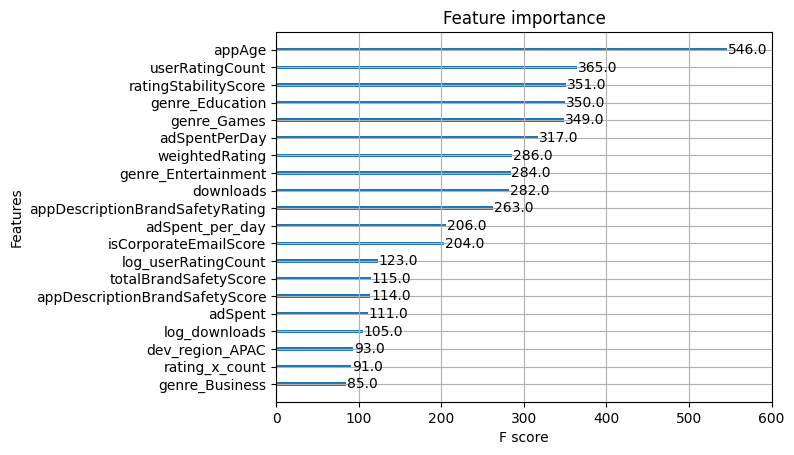

In [97]:
import xgboost as xgb

xgb.plot_importance(best_model,max_num_features=20)
plt.show()

In [98]:
importances = best_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance':importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance',ascending=False)
print(feat_imp_df.head(20))

                               Feature  Importance
31                     genre_Education    0.170059
36                         genre_Games    0.168191
32                 genre_Entertainment    0.049312
236                     rating_x_count    0.032900
0                      userRatingCount    0.032468
17      appDescriptionBrandSafetyScore    0.031734
59                      genre_Stickers    0.031137
18               totalBrandSafetyScore    0.029676
13                      weightedRating    0.028708
66             deviceType_clean_Global    0.025581
10     appDescriptionBrandSafetyRating    0.024934
235                log_userRatingCount    0.023307
68         deviceType_clean_Smartphone    0.023247
54                     genre_Reference    0.017387
60                         genre_Tools    0.016922
26                      genre_Business    0.016187
232                 dev_region_UNKNOWN    0.014127
71   developerCountry_clean_Not_Listed    0.011754
70       developerCountry_clean

In [99]:
submission = pd.read_csv("E:\\Lomba\\Find It\\data-analytics-competition-find-it-2025\\dataset\\submission_format.csv")
data_test = pd.read_csv("E:\\Lomba\\Find It\\hasil_test_encoded_5.csv")
submission = pd.DataFrame({
    'ID' : data_test['ID'],
    'coppaRisk' : y_prob
})
submission.to_csv('submission_19.csv',index=False)

# Submission_19.csv : 0.89368